# Capstone Project Module 2 Final

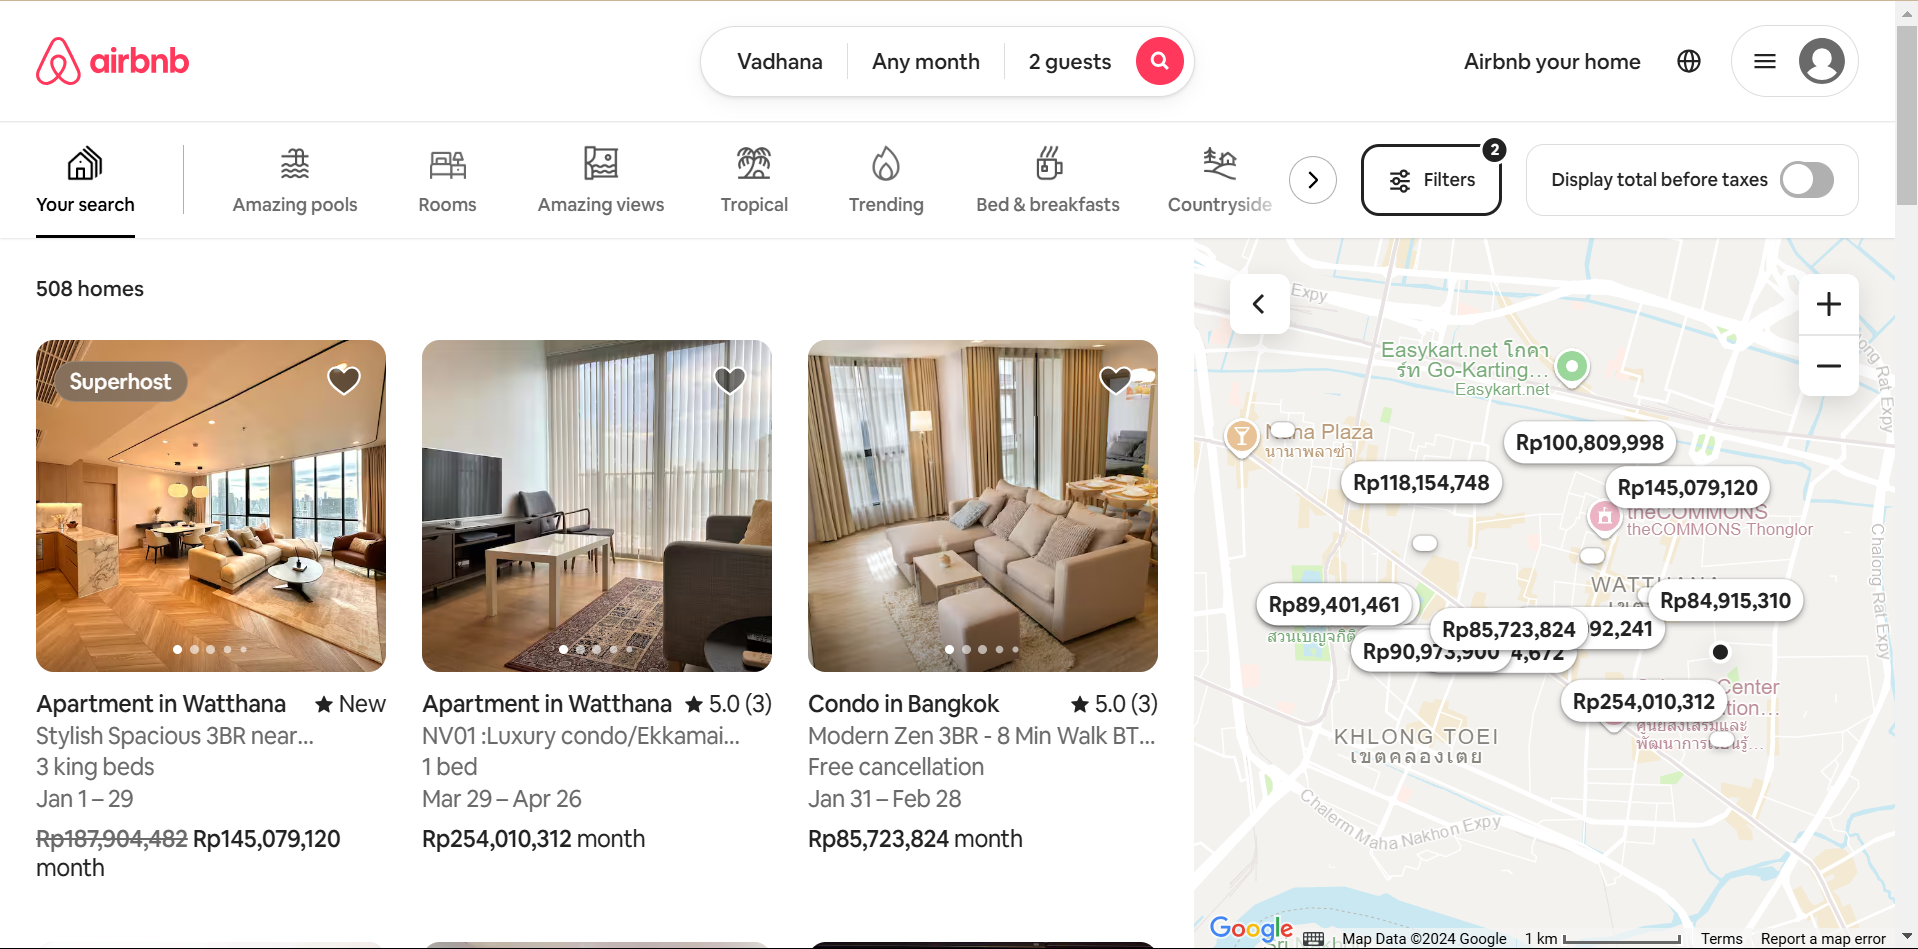

## Problem Background

The Airbnb market in Bangkok is highly competitive and diverse, catering to a wide range of travelers with varying preferences and budgets. Hosts aim to maximize occupancy and revenue by optimizing their listings, while guests seek accommodations that offer the best value, location, and amenities. Understanding the dynamics of this market is crucial for stakeholders to make informed decisions.

A notable observation in the Bangkok Airbnb market is the significant performance disparity among hosts who have a similar number of listings. Some hosts achieve high guest engagement and occupancy rates, reflected in metrics such as average reviews per month, while others with a comparable number of listings experience low engagement. This discrepancy raises questions about the factors contributing to differing host performances.

Additionally, certain neighborhoods, such as Vadhana, have emerged as hotspots with high-demand listings. Analyzing these areas can provide insights into market trends, popular room types, pricing strategies, and guest preferences.

## Proposed Analysis

To understand the factors influencing host performance and the disparities among hosts with similar listing counts, the following analyses are proposed:

1. Host Performance Comparison
- Objective: Investigate the factors contributing to performance disparities among hosts with a similar number of listings.
- Methodology:
  - Identify Top Hosts: Select a sample of hosts with a high number of listings for comparison.
  - Performance Metrics Analysis:
    - Reviews per Month: Compare average reviews per month to assess guest engagement.
    - Total Number of Reviews: Evaluate overall guest feedback and satisfaction.
  - Geographic Analysis:
    - Map the listings of selected hosts to visualize geographic distribution using interactive maps.
    - Assess whether location influences booking rates and guest engagement.
  - Pricing Strategy Analysis:
    - Compare average listing prices for each host.
    - Analyze how their pricing aligns with or deviates from neighborhood averages.
  - Room Type Analysis:
    - Examine the distribution of room types (e.g., entire home, private room) offered by each host.
    - Determine alignment with market demand and guest preferences.
  - Availability and Minimum Nights:
    - Compare availability calendars and minimum stay requirements.
    - Assess flexibility and accessibility for potential guests.
  - Listing Description Analysis:
    - Perform text analysis on listing names and descriptions to identify unique selling points.
    - Use word frequency analysis to uncover marketing strategies and highlight features that attract guests.

2. Neighborhood Analysis (e.g., Vadhana)
- Objective: Use high-demand neighborhoods as benchmarks to understand characteristics of successful listings.
- Methodology:
  - Room Type Popularity:
    - Identify the most common and sought-after room types in the neighborhood.
  - Price Analysis:
    - Analyze pricing trends specific to the neighborhood.
    - Compare prices with other areas to understand positioning.
  - Listing Name Analysis:
    - Identify common keywords and phrases in listing names that may appeal to guests.
  - Minimum Nights:
    - Examine minimum stay requirements and how they affect booking rates.
  - Visualization:
    - Create visualizations (e.g., bar charts, word clouds) to showcase popular listings and common themes.

3. Recommendations Development
- Objective: Provide actionable insights for hosts, guests, and the Airbnb platform based on the analysis.
- Methodology:
  - For Hosts:
    - Suggest pricing adjustments to align with market demand.
    - Recommend enhancements to listings, such as improved descriptions and amenities.
    - Propose strategies to increase availability and flexibility.
  - For Guests:
    - Highlight how to find accommodations that meet their needs based on price categories, locations, and amenities.

## Targeted Stakeholders

1. Hosts:
- Existing Hosts:
  - Benefit: Understand factors affecting their listing performance and receive recommendations to improve occupancy and guest engagement.
- New and Prospective Hosts:
  - Benefit: Gain insights into market trends, effective pricing strategies, and listing optimization to successfully enter and compete in the market.

2. Guests (Travelers):
- Benefit: Access information on popular neighborhoods, price categories, and room types to make informed accommodation choices that fit their preferences and budgets.

# Data Understanding

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import normaltest

## Load Dataset and Display Info

In [2]:
# 1. Load Dataset
airbnb_data = pd.read_csv('Airbnb Listings Bangkok.csv').drop(columns=['Unnamed: 0'])
airbnb_data

id                                               name  \
0                   27934                    Nice room with superb city view   
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
3                   35780     Spacious one bedroom at The Kris Condo Bldg. 3   
4                  941865                         Suite Room 3 at MetroPoint   
...                   ...                                                ...   
15849  790465040741092826      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id   host_name neighbourhood   latitude   longitude  \
0         120437      Nuttee   Ratchathewi  13.759830  100.541340   
1         120541         Emy       Bang Na  13.668180  100.616740   
2         123784  Familyroom     Bang Kapi  13.752320  100.624020   
3         153730     Sirilak     Din Daeng  13.788230  100.572560   
4         610315       Kasem     Bang Kapi  13.768720  100.633380   
...          ...         ...           ...        ...         ...   
15849   94899359       Renee       Pra Wet  13.715132  100.653458   
15850  491526222   Phakhamon   Ratchathewi  13.753052  100.538738   
15851  491526222   Phakhamon   Ratchathewi  13.753169  100.538700   
15852  491526222   Phakhamon   Ratchathewi  13.754789  100.538757   
15853  491526222   Phakhamon   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt   1905               3                 65  2020-01-06   
1         Private room   1316               1                  0         NaN   
2         Private room    800              60                  0         NaN   
3         Private room   1286               7                  2  2022-04-01   
4         Private room   1905               1                  0         NaN   
...                ...    ...             ...                ...         ...   
15849     Private room   2298              28                  0         NaN   
15850     Private room   1429               1                  0         NaN   
15851     Private room   1214               1                  0         NaN   
15852     Private room   1214               1                  0         NaN   
15853     Private room   1214               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.50                               2               353   
1                    NaN                               2               358   
2                    NaN                               1               365   
3                   0.03                               1               323   
4                    NaN                               3               365   
...                  ...                             ...               ...   
15849                NaN                               1               362   
15850                NaN                              14               365   
15851                NaN                              14               365   
15852                NaN                              14               365   
15853                NaN                              14               365   

       number_of_reviews_ltm  
0                          0  
1                          0  
2                          0  
3                          1  
4                          0  
...                      ...  
15849                      0  
15850                      0  
15851                      0  
15852                    

In [3]:
# Display DataFrame info
print("DataFrame Information:")
airbnb_data.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_p

| Column | Data Type | Description |
|---|---|---|
| Unnamed: 0 | Integer | Index of the dataset |
|id | Integer | Unique ID for each Airbnb listing|
|name |	Object |	Name of the listing or property|
|host_id |	Integer |	Unique ID for each host of the listing|
|host_name |	Object |	Name of the host (typically the first name)|
|neighbourhood |	Object |	Name of the neighborhood or area where the listing is located|
|latitude |	Float |	Latitude coordinates of the listing location using the World Geodetic System (WGS84)|
|longitude |	Float |	Longitude coordinates of the listing location using the World Geodetic System (WGS84)|
|room_type |	Object |	Type of room offered, such as Entire home/apt, Private room, Shared room, or Hotel room|
|price |	Integer |	Daily price of the listing in the local currency (e.g., Thai Baht - THB for Bangkok)|
|minimum_nights |	Integer |	Minimum number of nights required for booking the listing|
|number_of_reviews |	Integer |	Total number of reviews received by the listing|
|last_review |	Object |	Date of the most recent review
|reviews_per_month |	Float |	Average number of reviews received per month
|calculated_host_listings_count |	Integer |	Total number of listings owned by the host|
|availability_365 |	Integer |	Number of days the listing is available for rent in a year (maximum 365)|
|number_of_reviews_ltm |	Integer |	Number of reviews received in the last 12 months|

## Check Missing Values

In [4]:
# 2. Missing Values Analysis
def analyze_missing_values(df):
    missing_counts = df.isnull().sum()
    missing_percentage = (missing_counts / len(df)) * 100
    missing_summary = pd.DataFrame({
        'Column': missing_counts.index,
        'Missing Count': missing_counts.values,
        'Missing Percentage': missing_percentage.values
    }).sort_values(by='Missing Count', ascending=False)
    return missing_summary

analyze_missing_values(airbnb_data)

Column  Missing Count  Missing Percentage
11                     last_review           5790           36.520752
12               reviews_per_month           5790           36.520752
1                             name              8            0.050460
3                        host_name              1            0.006308
0                               id              0            0.000000
2                          host_id              0            0.000000
4                    neighbourhood              0            0.000000
5                         latitude              0            0.000000
6                        longitude              0            0.000000
7                        room_type              0            0.000000
8                            price              0            0.000000
9                   minimum_nights              0            0.000000
10               number_of_reviews              0            0.000000
13  calculated_host_listings_count              0            0.000000
14                availability_365              0            0.000000
15           number_of_reviews_ltm              0            0.000000

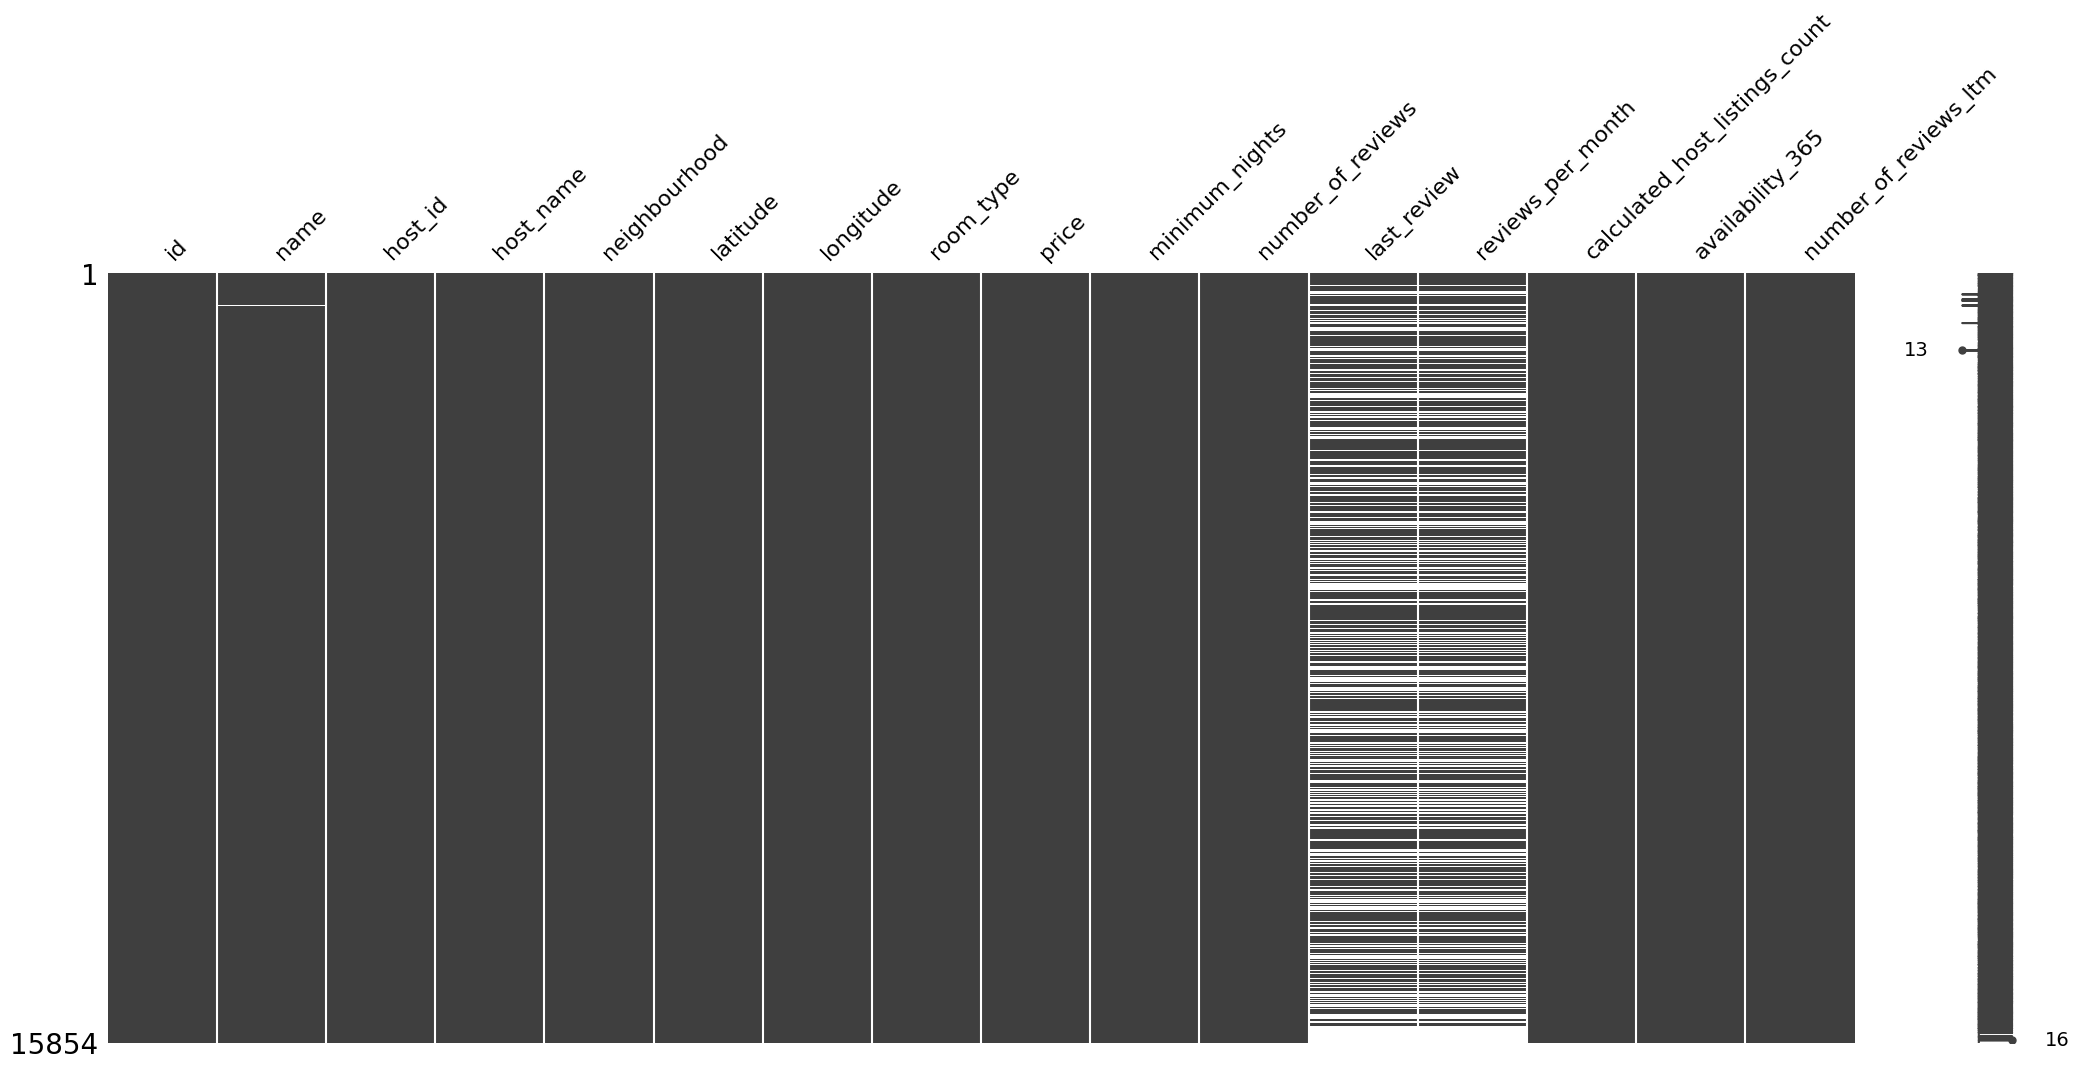

In [5]:
# Visualize missing values
msno.matrix(airbnb_data)
plt.show()

**Key Findings:**
1. `last_review` and `reviews_per_month`:
- These two columns have 36.52% missing values.
- These missing values are likely tied to listings that have no reviews.

2. `name` and `host_name`:
- name has 8 missing entries (0.05%), and host_name has 1 missing entry (0.006%).
- These are relatively minor and likely data entry issues.

3. Other Columns `(id, host_id, neighbourhood, etc.)`:
- The rest of the columns have 0% missing values, so no action is needed.

**Potential Impact:**
- Columns with a high percentage of missing values `(last_review, reviews_per_month)` might affect downstream analysis.
- Minimal missing data in name and host_name suggests limited disruption to insights about hosts or listings.

**Summary:**
- The dataset is mostly complete, with the exception of `last_review` and `reviews_per_month`. These missing values are likely meaningful (indicating no activity for certain listings), rather than errors.

## Check Duplicates

In [6]:
# 3. Duplicate Check
duplicates = airbnb_data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


In [7]:
# Duplicate based on location, neighborhood, last review, price, name, and room type
# The original code used 'data_clean', which was not defined.
# Replacing it with 'airbnb_data', which is the DataFrame loaded earlier.
data_duplicate = airbnb_data[airbnb_data.duplicated(subset=['latitude', 'longitude', 'neighbourhood', 'last_review', 'price', 'name', 'room_type'], keep=False)]
display('Number of duplicate records:', len(data_duplicate))
data_duplicate.head()

'Number of duplicate records:'

22

id                                     name    host_id  \
5890             28831409                NA BANGLAMPOO GUEST HOUSE   87704107   
5976             28907857                NA BANGLAMPOO GUEST HOUSE   87704107   
8789             37953702                                   small1   97598307   
8790             37954129                                   small1   97598307   
15120  767112544721073364  Sathon Luxury Loft/China Town/Icon Siam  276781306   

      host_name neighbourhood   latitude   longitude        room_type  price  \
5890        Yui   Phra Nakhon  13.762790  100.497900     Private room   1400   
5976        Yui   Phra Nakhon  13.762790  100.497900     Private room   1400   
8789        Soo    Don Mueang  13.920720  100.575780      Shared room    350   
8790        Soo    Don Mueang  13.920720  100.575780      Shared room    350   
15120      Alex        Sathon  13.710777  100.519891  Entire home/apt   1580   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
5890                1                  0         NaN                NaN   
5976                1                  0         NaN                NaN   
8789                1                  0         NaN                NaN   
8790                1                  0         NaN                NaN   
15120               1                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
5890                                9               361                      0  
5976                                9               361                      0  
8789                                4               180                      0  
8790                                4               180                      0  
15120                              13               326                      0

In [8]:
data_duplicate.groupby(['name','latitude','longitude','host_name'])[['id']].count()

id
name                                               latitude  longitude  host_name    
Family Room for 4 People                           13.740168 100.556320 Rachan      2
Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9    13.756184 100.568269 Tricia      1
                                                                        Willam      2
                                                   13.757097 100.568486 Alice       2
NA BANGLAMPOO GUEST HOUSE                          13.762790 100.497900 Yui         2
New! Gateway/ Bangkok University 1BR 2PPL near BTS 13.716669 100.584967 Nana        1
                                                                        Noons       1
Sathon Luxury 2 br/China Town/Icon Siam            13.710777 100.519891 Alex        1
                                                                        Alice       2
                                                                        Tricia      2
                                                                        Willam      1
Sathon Luxury Loft/China Town/Icon Siam            13.710777 100.519891 Alex        2
                                                                        Alice       1
small1                                             13.920720 100.575780 Soo         2

**Key Observations:**
1. Overall Duplicate Rows:
- No fully duplicated rows were found (duplicates = 0).
- This indicates there are no rows that are entirely identical across all columns.

2. Duplicates Based on Key Columns:
- When checking for duplicates based on specific attributes `(latitude, longitude, neighbourhood, last_review, price, name, room_type)`, 22 duplicate records were identified.
- These duplicates are likely related to listings with similar locations, names, and prices, suggesting either:
  - Multiple entries for the same property by the same or different hosts.
  - Legitimate duplicates for properties listed under slightly different criteria.

3. Potential Impact:
- These duplicates may distort analysis if not handled appropriately, especially for insights on unique properties or total listings.
- Depending on the analysis objective, these could be:
  - Removed: If the goal is to analyze unique properties.
  - Kept: If duplicates are valid and represent intentional entries (e.g., same property listed for different timeframes).


## Descriptive Statistics for Numeric Columns

In [9]:
# 4. Descriptive Statistics for Numeric Columns
print("\nDescriptive Statistics (Numeric Columns):")
print(airbnb_data.describe())


Descriptive Statistics (Numeric Columns):
                 id       host_id      latitude     longitude         price  \
count  1.585400e+04  1.585400e+04  15854.000000  15854.000000  1.585400e+04   
mean   1.579397e+17  1.541058e+08     13.745144    100.559903  3.217704e+03   
std    2.946015e+17  1.318726e+08      0.043040      0.050911  2.497212e+04   
min    2.793400e+04  5.892000e+04     13.527300    100.329550  0.000000e+00   
25%    2.104509e+07  3.974431e+07     13.720090    100.529690  9.000000e+02   
50%    3.503734e+07  1.224556e+08     13.738490    100.561415  1.429000e+03   
75%    5.256154e+07  2.390547e+08     13.759497    100.585150  2.429000e+03   
max    7.908162e+17  4.926659e+08     13.953540    100.923440  1.100000e+06   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    15854.000000       15854.000000       10064.000000   
mean        15.292355          16.654157           0.813145   
std         50.815020          40.613331           1.090

**Key Observations:**

1. `price`:
- Mean: 3,217.70, but median (50%): 1,429.00 → Indicates a right-skewed distribution with high variability.
- Min: 0 → Listings with zero price may need attention (e.g., invalid data or free listings).
- Max: 1,100,000 → Extremely high prices suggest potential outliers.

2. `minimum_nights`:
- Mean: 15.29, but median (50%): 1.00 → Indicates most listings have very short stays, with some extremely long ones.
- Max: 1,125 nights (over 3 years) → Likely outliers.

3. `number_of_reviews`:
- Mean: 16.65, but median (50%): 2.00 → Majority of listings have few reviews, with a long tail of highly reviewed properties.
- Max: 1,224 reviews → Represents a popular property.

4. `reviews_per_month`:
- Mean: 0.81, but the median (50%) is 0.435 → Skewed toward lower review activity.
- Max: 19.13 → Very high monthly review rates may indicate extremely active listings.

5. `calculated_host_listings_count`:
- Mean: 13.89, but median (50%): 4.00 → Most hosts manage a small number of listings, but a few manage a large portfolio.
- Max: 228 → Hosts with a significant number of listings may need closer examination.

6. `availability_365`:
- Mean: 244.38, median (50%): 309 → Most listings are available for a substantial portion of the year.
- Max: 365 → Fully available listings are common.

7. `number_of_reviews_ltm`:
- Mean: 3.48, median (50%): 0.00 → Many listings have no recent reviews.
- Max: 325 → Some listings remain highly active.

**Potential Data Quality Issues:**
- Extreme Values:
  - `price`: Listings with prices of 0 or above 1,000,000 may need validation or removal.
  - `minimum_nights`: Extremely high values (e.g., 1,125 nights) are likely unrealistic.
  - `calculated_host_listings_count`: Hosts with over 200 listings might represent corporate accounts or anomalies.
- Skewness:
Many columns (e.g., `price, number_of_reviews`) are heavily skewed, requiring transformations for better analysis.

## Histograms for Numeric Columns


In [10]:
# 5. Plot Histograms for Numeric Columns
def plot_histograms(df, numeric_cols):
    num_cols = 3
    num_rows = (len(numeric_cols) + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    for i, col in enumerate(numeric_cols):
        sns.histplot(data=df[col], kde=True, bins=20, ax=axes[i // num_cols, i % num_cols])
        axes[i // num_cols, i % num_cols].set_title(f'Histogram of {col}')
        axes[i // num_cols, i % num_cols].set_xlabel(col)
    for i in range(len(numeric_cols), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])
    plt.tight_layout()
    plt.show()

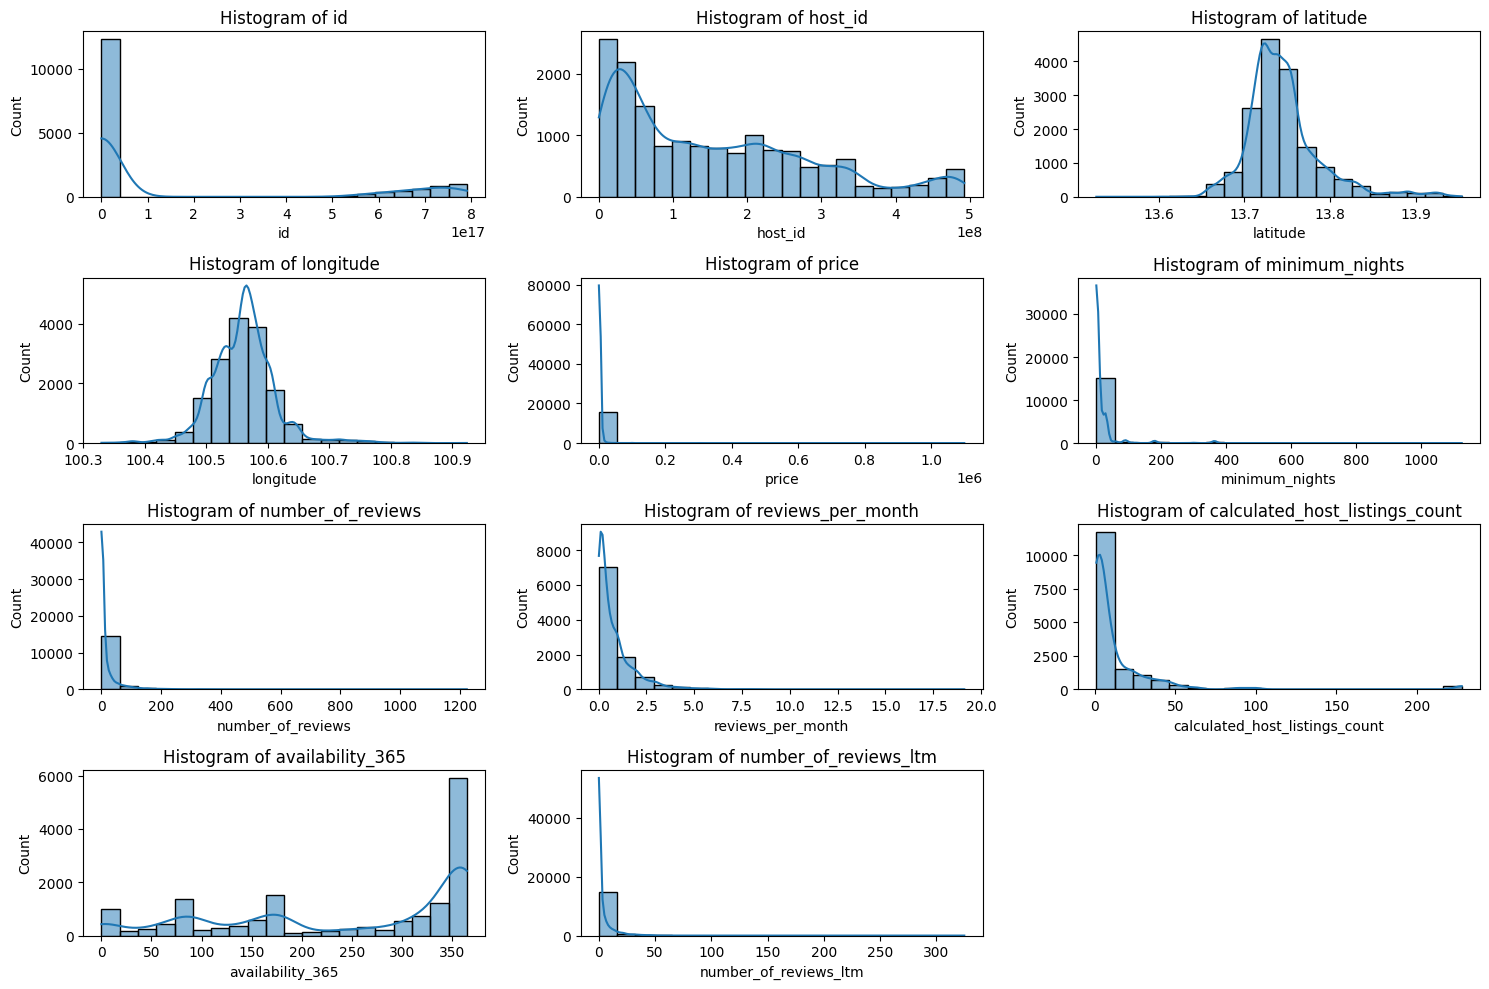

In [11]:
numeric_cols = airbnb_data.select_dtypes(include=['float64', 'int64']).columns
plot_histograms(airbnb_data, numeric_cols)

**Key Observations:**

1. `price`:
- Mean: 3,217.70, but median (50%): 1,429.00 → Indicates a right-skewed distribution with high variability.
- Min: 0 → Listings with zero price may need attention (e.g., invalid data or free listings).
- Max: 1,100,000 → Extremely high prices suggest potential outliers.

2. `minimum_nights`:
- Mean: 15.29, but median (50%): 1.00 → Indicates most listings have very short stays, with some extremely long ones.
- Max: 1,125 nights (over 3 years) → Likely outliers.

3. `number_of_reviews`:
- Mean: 16.65, but median (50%): 2.00 → Majority of listings have few reviews, with a long tail of highly reviewed properties.
- Max: 1,224 reviews → Represents a popular property.

4. `reviews_per_month`:
- Mean: 0.81, but the median (50%) is 0.435 → Skewed toward lower review activity.
- Max: 19.13 → Very high monthly review rates may indicate extremely active listings.

5. `calculated_host_listings_count`:
- Mean: 13.89, but median (50%): 4.00 → Most hosts manage a small number of listings, but a few manage a large portfolio.
- Max: 228 → Hosts with a significant number of listings may need closer examination.

6. `availability_365`:
- Mean: 244.38, median (50%): 309 → Most listings are available for a substantial portion of the year.
- Max: 365 → Fully available listings are common.

7. `number_of_reviews_ltm`:
- Mean: 3.48, median (50%): 0.00 → Many listings have no recent reviews.
- Max: 325 → Some listings remain highly active.

**Potential Data Quality Issues:**
- Extreme Values:
  - `price`: Listings with prices of 0 or above 1,000,000 may need validation or removal.
  - `minimum_nights`: Extremely high values (e.g., 1,125 nights) are likely unrealistic.
  - `calculated_host_listings_count`: Hosts with over 200 listings might represent corporate accounts or anomalies.
- Skewness:
Many columns (e.g., `price, number_of_reviews`) are heavily skewed, requiring transformations for better analysis.

## Normality Test


In [12]:
# 6. Normality Test for Numeric Columns
print("\nD'Agostino's K-squared Test Results:")
for col in numeric_cols:
    data_without_na = airbnb_data[col].dropna()
    stat, p = normaltest(data_without_na)
    print(f"{col}: Test Statistic = {stat:.2f}, p-value = {p:.5f} {'(Not Normal)' if p < 0.05 else '(Normal)'}")


D'Agostino's K-squared Test Results:
id: Test Statistic = 2897.53, p-value = 0.00000 (Not Normal)
host_id: Test Statistic = 1416.30, p-value = 0.00000 (Not Normal)
latitude: Test Statistic = 4357.58, p-value = 0.00000 (Not Normal)
longitude: Test Statistic = 2077.70, p-value = 0.00000 (Not Normal)
price: Test Statistic = 43049.94, p-value = 0.00000 (Not Normal)
minimum_nights: Test Statistic = 22191.92, p-value = 0.00000 (Not Normal)
number_of_reviews: Test Statistic = 19164.71, p-value = 0.00000 (Not Normal)
reviews_per_month: Test Statistic = 9084.27, p-value = 0.00000 (Not Normal)
calculated_host_listings_count: Test Statistic = 16475.89, p-value = 0.00000 (Not Normal)
availability_365: Test Statistic = 12899.89, p-value = 0.00000 (Not Normal)
number_of_reviews_ltm: Test Statistic = 24897.59, p-value = 0.00000 (Not Normal)


**Key Observations:**
1. All Columns are Non-Normal:
- Every numeric column tested has a p-value of 0.00000, which means the null hypothesis of normality is rejected.
- The test statistic values are also very high, confirming significant deviations from normality.

2. Implications of Non-Normality:
- Skewed Distributions:
  - This aligns with the histograms showing right-skewed distributions for most variables (e.g., price, number_of_reviews).
- Outliers:
  - Non-normality is often driven by outliers and long tails, which are evident in columns like price, minimum_nights, and availability_365.

3. Columns of Interest:
- price: Extreme non-normality (statistic = 43049.94) suggests it might require transformations (e.g., log transformation) for better analysis.
- minimum_nights: With a high test statistic (22191.92), this variable likely contains unrealistic values or outliers.
- availability_365: Non-normal due to peaks at specific intervals (e.g., 0, 365 days).

4. General Insights:
- Non-normality is expected in real-world data like Airbnb listings, as distributions are naturally skewed by extreme cases (e.g., luxury listings, superhosts).
- While non-normality isn't a problem for all analyses, it can impact statistical tests or models that assume normality (e.g., linear regression).


## Barplots for Categorical Variables


In [13]:
# 7. Barplot for Categorical Variables
categorical_cols = airbnb_data.select_dtypes(include='object').columns

<ipython-input-14-565ec9907f6a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-14-565ec9907f6a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-14-565ec9907f6a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-14-565ec9907f6a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-14-565ec9907f6a>:11: FutureWarning: 

Passing `pa

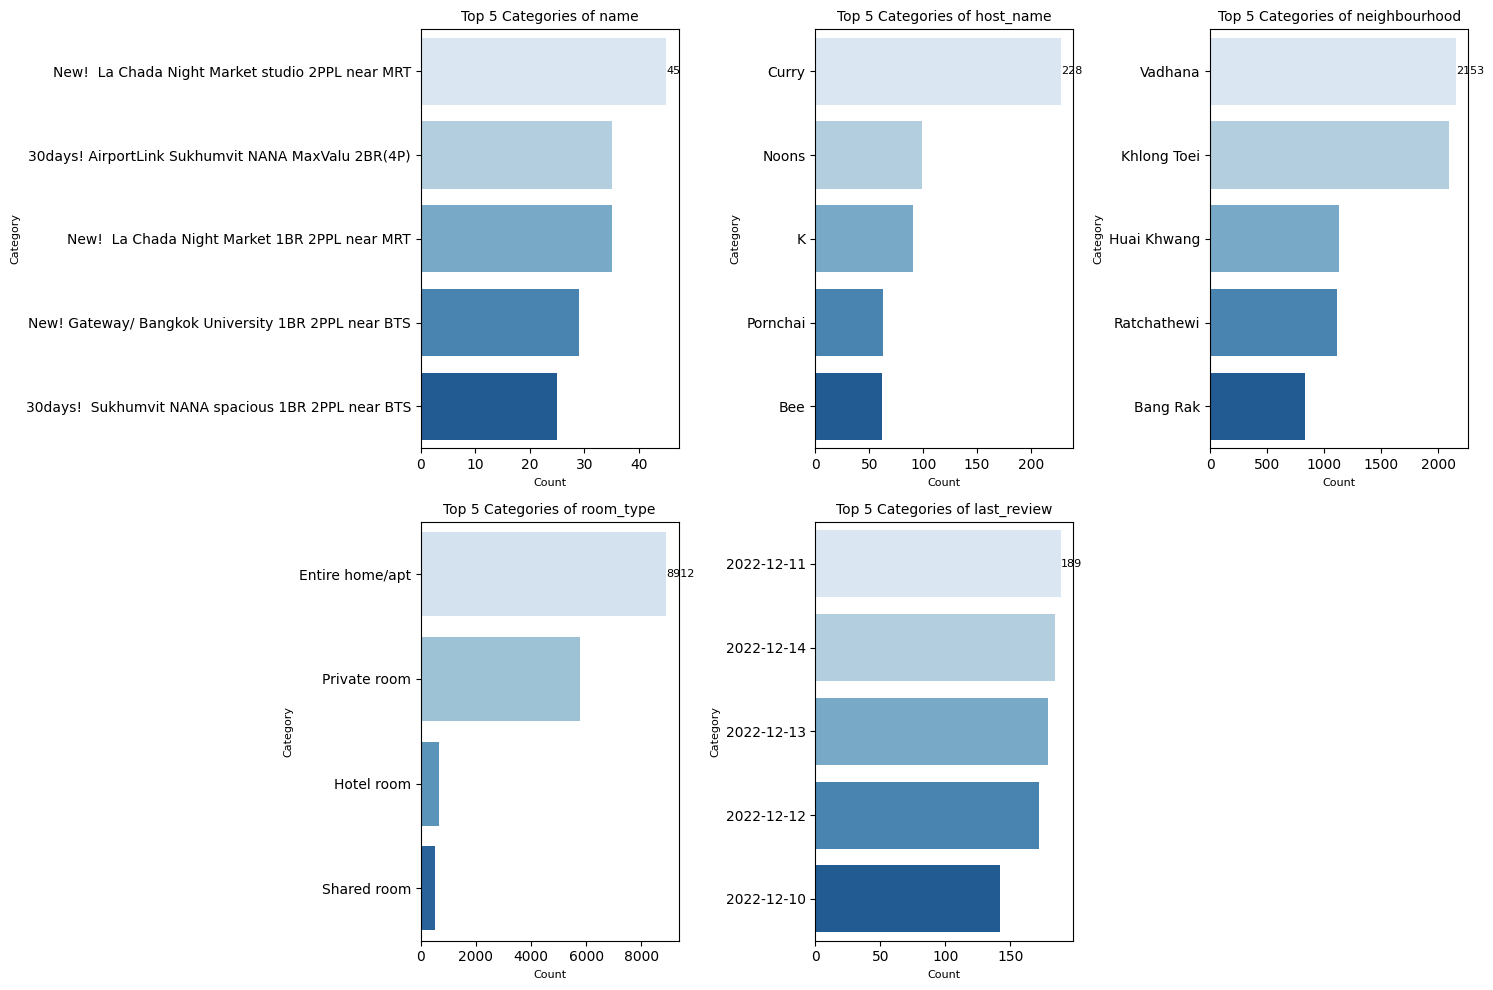

In [14]:
def plot_categorical_counts_with_histogram_style(df, cols, max_categories=5):
    num_cols = 3  # Number of columns for subplots
    num_rows = (len(cols) + num_cols - 1) // num_cols  # Calculate rows dynamically
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Define the figure and axes grid

    for i, col in enumerate(cols):
        ax = axes[i // num_cols, i % num_cols]  # Get the correct axis
        value_counts = df[col].value_counts().head(max_categories)  # Top categories
        # Dynamically adjust the color palette to match the number of bars
        color = sns.color_palette("Blues", n_colors=len(value_counts))
        sns.barplot(
            x=value_counts.values,
            y=value_counts.index,
            ax=ax,
            palette=color,
            hue=None,  # Explicitly set hue to None
            legend=False  # Disable legend
        )  # Horizontal barplot with consistent color palette
        ax.set_title(f'Top {max_categories} Categories of {col}', fontsize=10)
        ax.set_xlabel('Count', fontsize=8)
        ax.set_ylabel('Category', fontsize=8)
        ax.bar_label(ax.containers[0], fmt='%d', fontsize=8)  # Add counts above bars

    # Remove empty subplots
    for i in range(len(cols), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()  # Adjust layout for aesthetics
    plt.show()

# Call the function with improved aesthetics
plot_categorical_counts_with_histogram_style(airbnb_data, categorical_cols)

## Categorical Summary Table


In [15]:
# Import necessary library
import pandas as pd

def summarize_categorical_data(df, categorical_cols):
    """
    Summarizes categorical data using pandas' describe() method.

    Args:
        df: DataFrame containing the data.
        categorical_cols: List of categorical column names.

    Returns:
        DataFrame containing the summary.
    """
    summary = df[categorical_cols].describe(include='object')
    return summary

# Summary of Categorical Columns (call function after definition)
categorical_summary = summarize_categorical_data(airbnb_data, categorical_cols)
categorical_summary

name host_name  \
count                                              15846     15853   
unique                                             14794      5312   
top     New!  La Chada Night Market studio 2PPL near MRT     Curry   
freq                                                  45       228   

       neighbourhood        room_type last_review  
count          15854            15854       10064  
unique            50                4        1669  
top          Vadhana  Entire home/apt  2022-12-11  
freq            2153             8912         189

**Key Observations:**

1. name:
- The most frequent listing name is "New! La Chada Night Market studio 2PPL near MRT" (49 occurrences).
- Other popular names are similarly descriptive, suggesting multiple listings for similar or identical properties.

2. host_name:
- The most frequent host is "Curry" (228 listings).
- Hosts like "Noons" and "K" also manage a substantial number of properties, indicating the presence of professional property managers or corporate accounts.

3. neighbourhood:
- The top neighborhoods are:
  - Vadhana (2,153 listings) and Khlong Toei (1,814 listings), which are prominent areas in Bangkok.
- The distribution highlights the concentration of Airbnb properties in key tourist and business districts.

4. room_type:
- Entire home/apt dominates with 8,912 listings.
- Private room is the next most common (5,018 listings), indicating that a significant portion of listings caters to travelers seeking shared spaces.
- Hotel room and Shared room are much less common.

5. last_review:
- The most frequent review dates are recent, clustered around December 2022.
- This shows that many listings remain active and have been reviewed recently, which is a positive indicator of dataset recency.


**General Trends Across Categorical Variables:**
1. Dominance of Key Players:
- A few host_name and neighbourhood values dominate, suggesting a concentration of listings under certain hosts or in specific locations.

2. Room Type Preferences:
- Travelers primarily book entire apartments, which is consistent with typical Airbnb user behavior.

## Boxplots for Numeric Columns


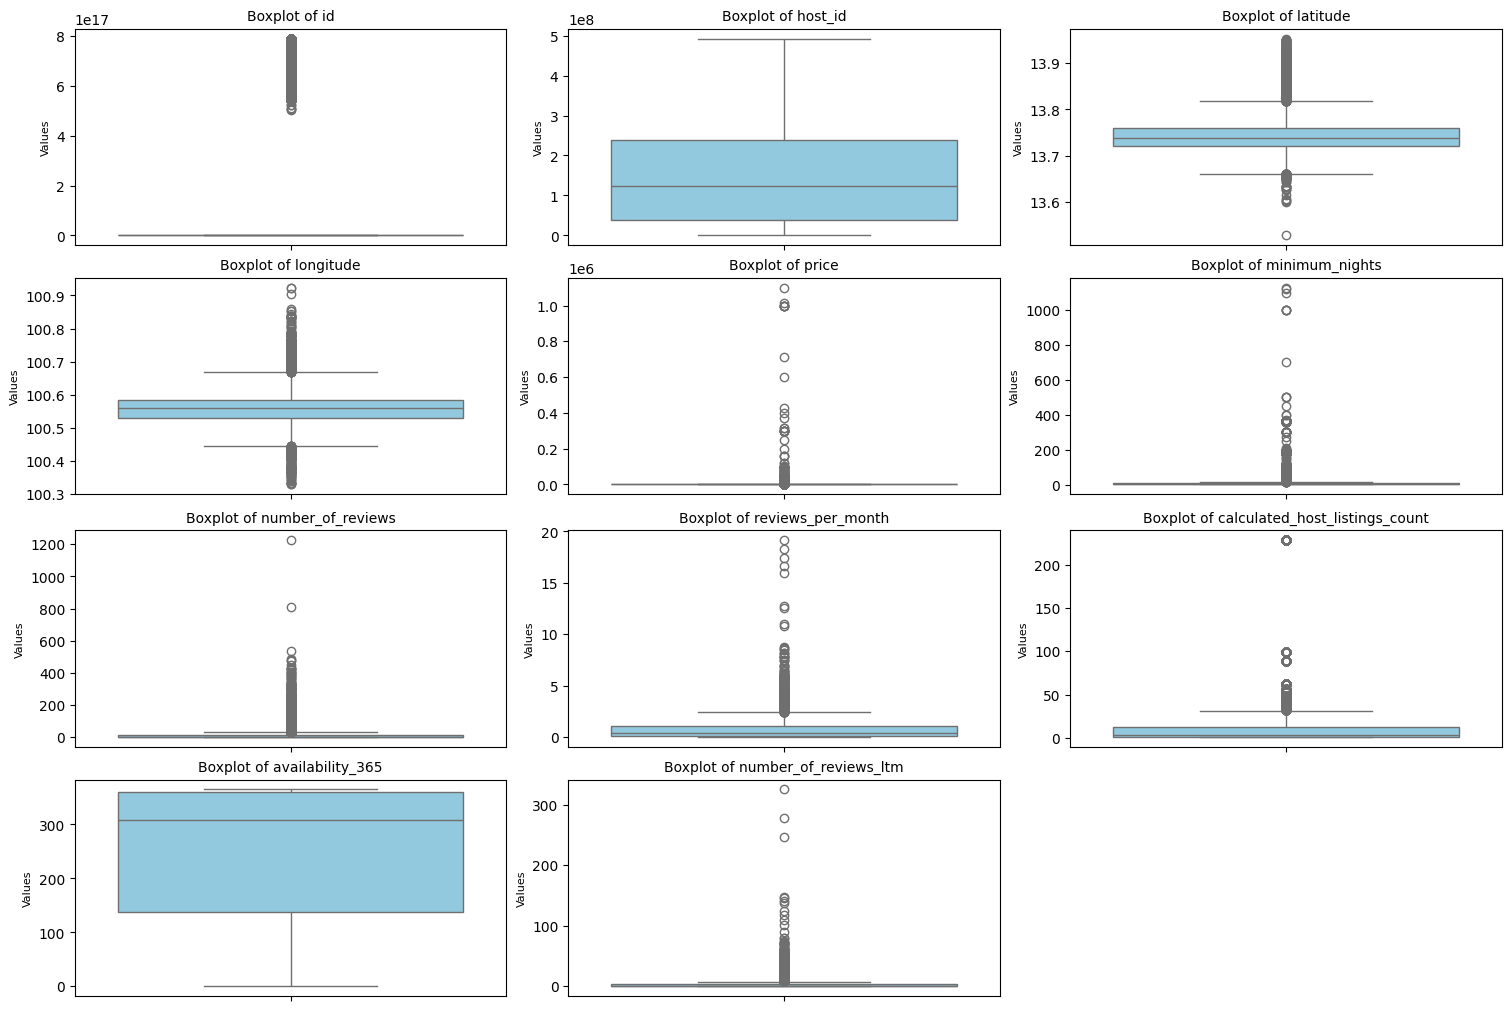

In [16]:
# Boxplot for num cols
def plot_boxplots(df, cols):
    # Set up the grid layout
    num_cols = 3  # Number of columns for subplots
    num_rows = (len(cols) + num_cols - 1) // num_cols  # Calculate rows dynamically
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10), constrained_layout=True)

    # Loop through columns and create individual boxplots
    for i, col in enumerate(cols):
        ax = axes[i // num_cols, i % num_cols]  # Get the correct axis
        sns.boxplot(data=df[col], ax=ax, color='skyblue')  # Single boxplot with custom color
        ax.set_title(f'Boxplot of {col}', fontsize=10)  # Set title
        ax.set_xlabel('')  # Clear x-axis label
        ax.set_ylabel('Values', fontsize=8)  # Set y-axis label for scale

    # Remove empty subplots
    for i in range(len(cols), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.show()

# Call the function with improved aesthetics
plot_boxplots(airbnb_data, numeric_cols)

**General Trends Across Boxplots:**
1. Widespread Outliers:
- Nearly all numeric columns (except availability_365) exhibit significant outliers, consistent with the histograms and non-normal distributions.
2. Clustering:
- Most data points are tightly clustered near the lower end of the range, with outliers driving the long tails.

In [17]:
from IPython.display import display

filtered_data = airbnb_data[airbnb_data['price'] > 600000]
display(filtered_data)

id                                               name  \
1239              8880974                 Modern,wifi,5m MRT&2 Shopping Mall   
1779             11579635                 2 Bedroom,wifi,5mMRT&Shopping Mall   
4373             22633450                                rm 1 : cozy & comfy   
4620             23740993       Modern&Luxury apartment,5min to MRT,freeWifi   
6289             29909847       BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR   
9345             39858231                1BR cozy condo  close to ONNUT BTS.   
12300  562972065309061724  3B中文No Guest Service Fee@Nana Asok/Soi11 Night...   
12868  635676064543597376              New 1 bedroom apartment BTS MRT Asoke   
15200  766201549677186657      80米轻轨站，空中泳池+健身房，I con siam沙吞河景圈，距离大皇宫4公里，乳胶床垫   

         host_id host_name neighbourhood   latitude   longitude  \
1239    30803267   Yasmine   Huai Khwang  13.759950  100.569360   
1779    30803267   Yasmine   Huai Khwang  13.754710  100.565980   
4373   117057915      Jeab    Bang Phlat  13.791630  100.490380   
4620    30803267   Yasmine   Huai Khwang  13.760650  100.568980   
6289   210559448      Cora   Khlong Toei  13.703330  100.592470   
9345   210559448      Cora   Khlong Toei  13.704960  100.591510   
12300  131427125        Jj       Vadhana  13.746660  100.559100   
12868   12464705     Lucio       Vadhana  13.742186  100.560394   
15200   28589379      Lily    Khlong San  13.721270  100.495270   

             room_type    price  minimum_nights  number_of_reviews  \
1239   Entire home/apt  1000000             100                 45   
1779   Entire home/apt  1000000             100                 53   
4373      Private room   600700               1                  9   
4620   Entire home/apt  1000000               1                 12   
6289   Entire home/apt  1000000               2                 69   
9345   Entire home/apt  1000000              25                  2   
12300  Entire home/apt  1014758              30                  2   
12868  Entire home/apt  1100000              14                  0   
15200  Entire home/apt   710760              12                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
1239   2016-09-05               0.51                               4   
1779   2018-02-20               0.64                               4   
4373   2020-01-26               0.17                               5   
4620   2020-03-24               0.22                               4   
6289   2020-03-12               1.39                               6   
9345   2020-02-23               0.05                               6   
12300  2022-09-17               0.32                              10   
12868         NaN                NaN                               1   
15200         NaN                NaN                               1   

       availability_365  number_of_reviews_ltm  
1239                180                      0  
1779                249                      0  
4373                330                      0  
4620                336                      0  
6289                 90                      0  
9345                 88                      0  
12300                75                      2  
12868               365                      0  
15200               313                      0

## Outliers Detection Using IQR

In [18]:
# 9. Outlier Detection Using IQR
def calculate_outliers(df, cols):
    outlier_summary = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outliers_below = (df[col] < lower_bound).sum()
        outliers_above = (df[col] > upper_bound).sum()
        outlier_summary[col] = {
            'Outliers Below': outliers_below,
            'Outliers Above': outliers_above,
            'Total Outliers': outliers_below + outliers_above,
            'Outlier Percentage': (outliers_below + outliers_above) / len(df) * 100
        }
    return pd.DataFrame(outlier_summary).T.sort_values(by='Total Outliers', ascending=False)

outlier_summary = calculate_outliers(airbnb_data, numeric_cols)
outlier_summary

Outliers Below  Outliers Above  \
id                                         0.0          3571.0   
minimum_nights                             0.0          3168.0   
number_of_reviews                          0.0          2240.0   
number_of_reviews_ltm                      0.0          2219.0   
calculated_host_listings_count             0.0          1832.0   
price                                      0.0          1403.0   
latitude                                 122.0           973.0   
reviews_per_month                          0.0           693.0   
longitude                                210.0           392.0   
host_id                                    0.0             0.0   
availability_365                           0.0             0.0   

                                Total Outliers  Outlier Percentage  
id                                      3571.0           22.524284  
minimum_nights                          3168.0           19.982339  
number_of_reviews                       2240.0           14.128926  
number_of_reviews_ltm                   2219.0           13.996468  
calculated_host_listings_count          1832.0           11.555443  
price                                   1403.0            8.849502  
latitude                                1095.0            6.906774  
reviews_per_month                        693.0            4.371137  
longitude                                602.0            3.797149  
host_id                                    0.0            0.000000  
availability_365                           0.0            0.000000

**General Insights:**
1. Outlier Prevalence:
- Around 20% of rows contain outliers in at least one major column (e.g., minimum_nights, price, number_of_reviews).
2. Impact of Outliers:
- These outliers heavily influence the dataset's distribution and should be addressed during data cleaning.
- Whether to remove or retain them depends on the specific analysis goals:
  - For general trends, outliers may need to be removed.
  - For identifying extreme cases, outliers are critical.

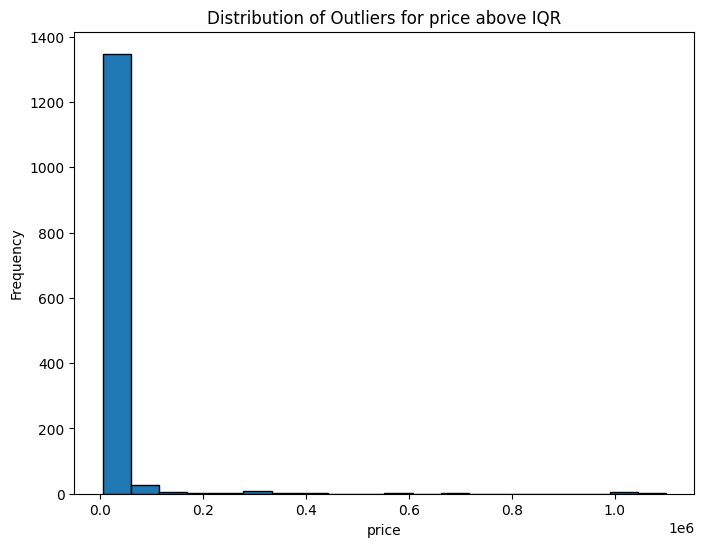

In [19]:
# prompt: visualize the range count of outliers above IQR for price only

import matplotlib.pyplot as plt

def visualize_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[df[col] > upper_bound]

    plt.figure(figsize=(8, 6))
    plt.hist(outliers[col], bins=20, edgecolor='black')
    plt.title(f'Distribution of Outliers for {col} above IQR')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

visualize_outliers(airbnb_data, 'price')

In [20]:
# prompt: make a summarical tabel for outliers above IQR in price, and categorize it by range

def categorize_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[df[col] > upper_bound]

    # Define price ranges for categorization
    price_ranges = [(0, 1000), (1000, 5000), (5000, 10000), (10000, float('inf'))]  # Adjust ranges as needed
    categories = []

    for price in outliers[col]:
        for lower, upper in price_ranges:
            if lower < price <= upper:
                categories.append(f'{lower}-{upper}')
                break
    outliers['Price Category'] = categories

    # Summarize outliers by category
    summary_table = outliers.groupby('Price Category').size().reset_index(name='Count')

    return summary_table


# Example usage:
outlier_summary_table = categorize_outliers(airbnb_data, 'price')
outlier_summary_table

<ipython-input-20-f49a180154a6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Price Category'] = categories


Price Category  Count
0      1000-5000    217
1      10000-inf    375
2     5000-10000    811

In [21]:
# prompt: Filter column price with value above 600000

filtered_data = airbnb_data[airbnb_data['price'] > 600000]
filtered_data

id                                               name  \
1239              8880974                 Modern,wifi,5m MRT&2 Shopping Mall   
1779             11579635                 2 Bedroom,wifi,5mMRT&Shopping Mall   
4373             22633450                                rm 1 : cozy & comfy   
4620             23740993       Modern&Luxury apartment,5min to MRT,freeWifi   
6289             29909847       BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR   
9345             39858231                1BR cozy condo  close to ONNUT BTS.   
12300  562972065309061724  3B中文No Guest Service Fee@Nana Asok/Soi11 Night...   
12868  635676064543597376              New 1 bedroom apartment BTS MRT Asoke   
15200  766201549677186657      80米轻轨站，空中泳池+健身房，I con siam沙吞河景圈，距离大皇宫4公里，乳胶床垫   

         host_id host_name neighbourhood   latitude   longitude  \
1239    30803267   Yasmine   Huai Khwang  13.759950  100.569360   
1779    30803267   Yasmine   Huai Khwang  13.754710  100.565980   
4373   117057915      Jeab    Bang Phlat  13.791630  100.490380   
4620    30803267   Yasmine   Huai Khwang  13.760650  100.568980   
6289   210559448      Cora   Khlong Toei  13.703330  100.592470   
9345   210559448      Cora   Khlong Toei  13.704960  100.591510   
12300  131427125        Jj       Vadhana  13.746660  100.559100   
12868   12464705     Lucio       Vadhana  13.742186  100.560394   
15200   28589379      Lily    Khlong San  13.721270  100.495270   

             room_type    price  minimum_nights  number_of_reviews  \
1239   Entire home/apt  1000000             100                 45   
1779   Entire home/apt  1000000             100                 53   
4373      Private room   600700               1                  9   
4620   Entire home/apt  1000000               1                 12   
6289   Entire home/apt  1000000               2                 69   
9345   Entire home/apt  1000000              25                  2   
12300  Entire home/apt  1014758              30                  2   
12868  Entire home/apt  1100000              14                  0   
15200  Entire home/apt   710760              12                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
1239   2016-09-05               0.51                               4   
1779   2018-02-20               0.64                               4   
4373   2020-01-26               0.17                               5   
4620   2020-03-24               0.22                               4   
6289   2020-03-12               1.39                               6   
9345   2020-02-23               0.05                               6   
12300  2022-09-17               0.32                              10   
12868         NaN                NaN                               1   
15200         NaN                NaN                               1   

       availability_365  number_of_reviews_ltm  
1239                180                      0  
1779                249                      0  
4373                330                      0  
4620                336                      0  
6289                 90                      0  
9345                 88                      0  
12300                75                      2  
12868               365                      0  
15200               313                      0

In [22]:
# prompt: count filtered data for values above 600000 in column price

# Assuming 'airbnb_data' is your DataFrame
# Replace with your actual DataFrame if named differently

# Count the number of values in the 'price' column that are above 600000
count_above_600000 = (airbnb_data['price'] > 600000).sum()

print(f"Number of values above 600000 in 'price' column: {count_above_600000}")

Number of values above 600000 in 'price' column: 9


We're going to replace this with the median data

## Correlation Analysis


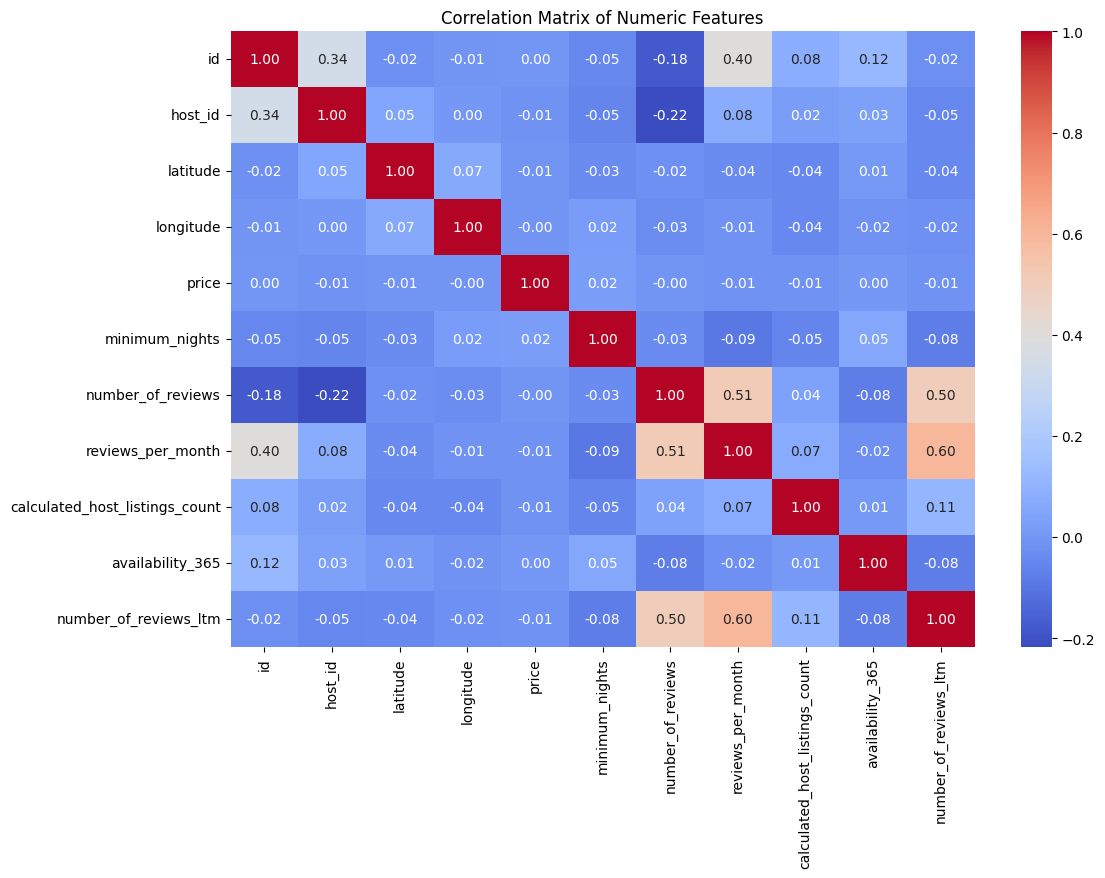

In [23]:
# 10. Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = airbnb_data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

**Key Observations:**
1. Highly Correlated Features:
- reviews_per_month and number_of_reviews: Correlation = 0.51.
  - These features are moderately correlated, which makes sense since a higher total number of reviews often correlates with higher monthly activity.
- reviews_per_month and number_of_reviews_ltm: Correlation = 0.60.
  - This indicates a stronger relationship, as recent review activity is closely tied to overall monthly activity.
2. Low or No Correlation:
- price: Shows little to no correlation with any other feature.
  - Suggests that price is likely influenced by unobserved factors (e.g., property amenities, location attractiveness).
- minimum_nights: Shows weak correlations with all other features.
  - Indicates that minimum stay requirements are generally independent of other listing characteristics.
3. Geospatial Variables:
- latitude and longitude:
  - Weak correlations with all other features. This is expected, as geographical coordinates do not directly influence most numerical metrics like price or reviews.
4. Host Activity:
- calculated_host_listings_count: Weakly correlated with:
  - reviews_per_month (0.07): Suggests that professional hosts managing multiple listings don’t necessarily have higher review activity per listing.
  - availability_365 (0.10): Indicates that hosts with more listings tend to keep them available longer.

**General Insights:**
- No Multicollinearity Issues:
  - The correlations are generally low to moderate, suggesting that features are relatively independent of each other.
- Actionable Relationships:
  Relationships between reviews_per_month, number_of_reviews, and number_of_reviews_ltm could be leveraged in predictive models, as these features exhibit meaningful correlations.

**Summary:**
- The correlation matrix highlights useful relationships (e.g., review-related features) while confirming the independence of others (e.g., price, minimum_nights).

# Data Cleaning

In [24]:
# prompt: copy airbnb_data for data cleaning

# Assuming airbnb_data is already loaded as a pandas DataFrame
# If not, load it first:
# airbnb_data = pd.read_csv("your_file.csv")

airbnb_data_cleaned = airbnb_data.copy() # Create a copy to avoid modifying the original|

In [25]:
print(airbnb_data_cleaned.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')


In [26]:
airbnb_data_cleaned

id                                               name  \
0                   27934                    Nice room with superb city view   
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
3                   35780     Spacious one bedroom at The Kris Condo Bldg. 3   
4                  941865                         Suite Room 3 at MetroPoint   
...                   ...                                                ...   
15849  790465040741092826      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id   host_name neighbourhood   latitude   longitude  \
0         120437      Nuttee   Ratchathewi  13.759830  100.541340   
1         120541         Emy       Bang Na  13.668180  100.616740   
2         123784  Familyroom     Bang Kapi  13.752320  100.624020   
3         153730     Sirilak     Din Daeng  13.788230  100.572560   
4         610315       Kasem     Bang Kapi  13.768720  100.633380   
...          ...         ...           ...        ...         ...   
15849   94899359       Renee       Pra Wet  13.715132  100.653458   
15850  491526222   Phakhamon   Ratchathewi  13.753052  100.538738   
15851  491526222   Phakhamon   Ratchathewi  13.753169  100.538700   
15852  491526222   Phakhamon   Ratchathewi  13.754789  100.538757   
15853  491526222   Phakhamon   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt   1905               3                 65  2020-01-06   
1         Private room   1316               1                  0         NaN   
2         Private room    800              60                  0         NaN   
3         Private room   1286               7                  2  2022-04-01   
4         Private room   1905               1                  0         NaN   
...                ...    ...             ...                ...         ...   
15849     Private room   2298              28                  0         NaN   
15850     Private room   1429               1                  0         NaN   
15851     Private room   1214               1                  0         NaN   
15852     Private room   1214               1                  0         NaN   
15853     Private room   1214               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.50                               2               353   
1                    NaN                               2               358   
2                    NaN                               1               365   
3                   0.03                               1               323   
4                    NaN                               3               365   
...                  ...                             ...               ...   
15849                NaN                               1               362   
15850                NaN                              14               365   
15851                NaN                              14               365   
15852                NaN                              14               365   
15853                NaN                              14               365   

       number_of_reviews_ltm  
0                          0  
1                          0  
2                          0  
3                          1  
4                          0  
...                      ...  
15849                      0  
15850                      0  
15851                      0  
15852                    

## Changing Data Type to Appropriate Format

In [27]:
# Change 'host_id' into object
airbnb_data_cleaned['host_id'] = airbnb_data_cleaned['host_id'].astype(str)

In [28]:
# Change 'id' into object
airbnb_data_cleaned['id'] = airbnb_data_cleaned['id'].astype(str)

In [29]:
# Show columns
airbnb_data_cleaned.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

## Handling Zero Values

In [30]:
# Replacing 0 values in column price
airbnb_data_cleaned['price'] = airbnb_data_cleaned['price'].replace(0, airbnb_data_cleaned[airbnb_data_cleaned['price'] != 0]['price'].median())

In [31]:
# prompt: descriptive stats for column price

# Assuming 'airbnb_data' is your DataFrame
# Replace with your actual DataFrame if named differently

# Descriptive statistics for the 'price' column
price_stats = airbnb_data_cleaned['price'].describe()
price_stats

count    1.585400e+04
mean     3.217794e+03
std      2.497211e+04
min      2.780000e+02
25%      9.000000e+02
50%      1.429000e+03
75%      2.429000e+03
max      1.100000e+06
Name: price, dtype: float64

## Handling Missing Values

In [32]:
# prompt: handle missing values in airbnb_data_cleaned
# for column last_review, use 9999-12-31 to replace the missing value
# for column reviews_per_month fill it with 0f

# Handle missing values
airbnb_data_cleaned['last_review'] = airbnb_data_cleaned['last_review'].fillna('9999-12-31')
airbnb_data_cleaned['reviews_per_month'] = airbnb_data_cleaned['reviews_per_month'].fillna(0)

In [33]:
# prompt: handle missing values in airbnb_data_cleaned
# for column name, fill with no information
# for column host_name, fill with no information

# Handle missing values
airbnb_data_cleaned['name'] = airbnb_data_cleaned['name'].fillna('No information')
airbnb_data_cleaned['host_name'] = airbnb_data_cleaned['host_name'].fillna('No information')

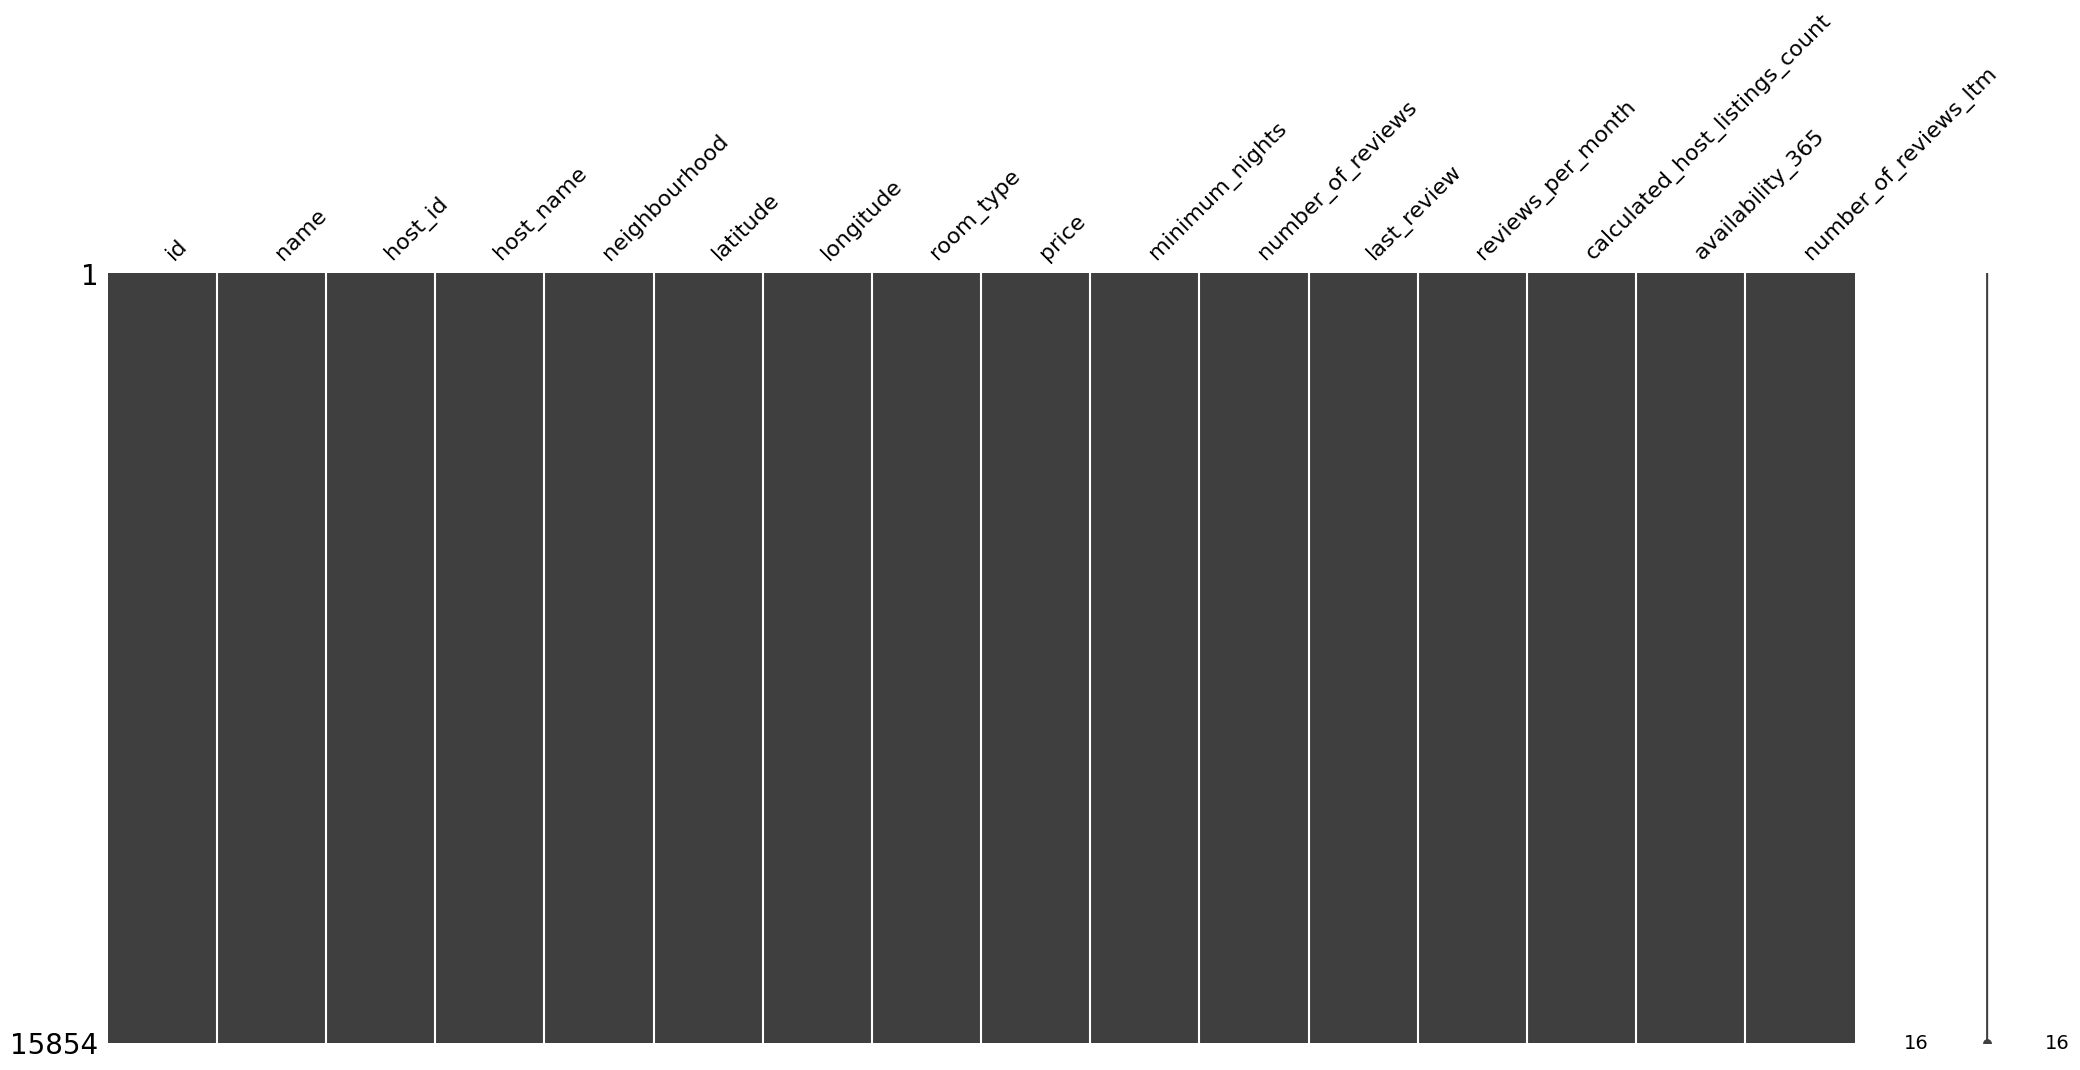

In [34]:
# prompt: missingno matrix in airbnb_data_cleaned

import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Assuming airbnb_data_cleaned is your DataFrame
# Replace with your actual DataFrame if named differently

# Create the missingno matrix
msno.matrix(airbnb_data_cleaned)
plt.show()

## Handling Duplicates

In [35]:
# Drop exact duplicates
airbnb_data_cleaned = airbnb_data_cleaned.drop_duplicates(subset=['name', 'latitude', 'longitude', 'host_name'], keep='first')
airbnb_data_cleaned

id                                               name  \
0                   27934                    Nice room with superb city view   
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
3                   35780     Spacious one bedroom at The Kris Condo Bldg. 3   
4                  941865                         Suite Room 3 at MetroPoint   
...                   ...                                                ...   
15849  790465040741092826      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id   host_name neighbourhood   latitude   longitude  \
0         120437      Nuttee   Ratchathewi  13.759830  100.541340   
1         120541         Emy       Bang Na  13.668180  100.616740   
2         123784  Familyroom     Bang Kapi  13.752320  100.624020   
3         153730     Sirilak     Din Daeng  13.788230  100.572560   
4         610315       Kasem     Bang Kapi  13.768720  100.633380   
...          ...         ...           ...        ...         ...   
15849   94899359       Renee       Pra Wet  13.715132  100.653458   
15850  491526222   Phakhamon   Ratchathewi  13.753052  100.538738   
15851  491526222   Phakhamon   Ratchathewi  13.753169  100.538700   
15852  491526222   Phakhamon   Ratchathewi  13.754789  100.538757   
15853  491526222   Phakhamon   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt   1905               3                 65  2020-01-06   
1         Private room   1316               1                  0  9999-12-31   
2         Private room    800              60                  0  9999-12-31   
3         Private room   1286               7                  2  2022-04-01   
4         Private room   1905               1                  0  9999-12-31   
...                ...    ...             ...                ...         ...   
15849     Private room   2298              28                  0  9999-12-31   
15850     Private room   1429               1                  0  9999-12-31   
15851     Private room   1214               1                  0  9999-12-31   
15852     Private room   1214               1                  0  9999-12-31   
15853     Private room   1214               1                  0  9999-12-31   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.50                               2               353   
1                   0.00                               2               358   
2                   0.00                               1               365   
3                   0.03                               1               323   
4                   0.00                               3               365   
...                  ...                             ...               ...   
15849               0.00                               1               362   
15850               0.00                              14               365   
15851               0.00                              14               365   
15852               0.00                              14               365   
15853               0.00                              14               365   

       number_of_reviews_ltm  
0                          0  
1                          0  
2                          0  
3                          1  
4                          0  
...                      ...  
15849                      0  
15850                      0  
15851                      0  
15852                    

Dropping exact duplicates decreased the total amount of data from 15854 to 15799

## Handling Outliers

In [36]:
# prompt: show rows in airbnb_data_cleaned for minimum_nights with value above 400. and count the amount

# Assuming airbnb_data_cleaned is your DataFrame
# Replace with your actual DataFrame if named differently

# Filter rows where 'minimum_nights' is greater than 30
filtered_df = airbnb_data_cleaned[airbnb_data_cleaned['minimum_nights'] > 40]

# Display the filtered rows
display(filtered_df)

# Count the number of rows in the filtered DataFrame
count = len(filtered_df)
print(f"\nNumber of rows with minimum_nights > 40: {count}")

id                                 name    host_id  \
2                   28745    modern-style apartment in Bangkok     123784   
5                 1704776       NEw Pro!!  Bungalow Bkk Centre    2129668   
23                1808600  Contemporary Modern Duplex-Thong Lo    9478184   
38                1842066   ICONSIAM River view  on 49th floor    9626074   
39                 169514  2br apt in Sukhumvit Asoke near BTS     729617   
...                   ...                                  ...        ...   
15655  787580096612257949             LIFE拉玛九HYPE天空泳池CBD35平大一居  270215556   
15670  783793175027130306      Spectacular Panorama view condo  295164261   
15686  784311306695823680             Luxury one bedroom Silom  479640508   
15695  785232852636103149          The Aree condo near BTS Ari  491978643   
15745  786451388410610293        Cozy, lovely and convenient !  140670028   

        host_name  neighbourhood   latitude   longitude        room_type  \
2      Familyroom      Bang Kapi  13.752320  100.624020     Private room   
5        Wimonpak  Bang Kho laen  13.697570  100.528800  Entire home/apt   
23          Shine    Khlong Toei  13.720970  100.578230  Entire home/apt   
38          Weera       Bang Rak  13.722870  100.516780     Private room   
39       Kanchuya        Vadhana  13.744640  100.557840  Entire home/apt   
...           ...            ...        ...         ...              ...   
15655    Ideomobi    Ratchathewi  13.753760  100.562272  Entire home/apt   
15670      Farsai    Khlong Toei  13.728487  100.565456  Entire home/apt   
15686        Yoyo       Bang Rak  13.727640  100.524220  Entire home/apt   
15695      Natcha     Phaya Thai  13.781758  100.540628  Entire home/apt   
15745    Panthira        Vadhana  13.714492  100.592487  Entire home/apt   

       price  minimum_nights  number_of_reviews last_review  \
2        800              60                  0  9999-12-31   
5       1000             250                 19  2017-08-03   
23      2078              60                 83  2018-09-12   
38      2500             180                 15  2015-12-08   
39      1732              90                  0  9999-12-31   
...      ...             ...                ...         ...   
15655    800              60                  0  9999-12-31   
15670   2076              80                  0  9999-12-31   
15686   3200             180                  0  9999-12-31   
15695   2000             180                  0  9999-12-31   
15745    640              90                  0  9999-12-31   

       reviews_per_month  calculated_host_listings_count  availability_365  \
2                   0.00                               1               365   
5                   0.17                              41               365   
23                  0.75                               1                55   
38                  0.14                               1                88   
39                  0.00                               1               365   
...                  ...                             ...               ...   
15655               0.00                              28               365   
15670               0.00                               3               173   
15686               0.00                              10               365   
15695               0.00                               1               363   
15745               0.00                               1               282   

       number_of_reviews_ltm  
2                          0  
5                          0  
23                         0  
38                         0  
39                         0  
...                      ...  
15655                      0  
15670                      0  
15686                      0  
15695                      0  
15745                      0  

[816 rows x 16 columns]


Number of rows with minimum_nights > 40: 816


In [37]:
# prompt: average price for minimum_nights above 30 in airbnb_data_cleaned

import pandas as pd

# Assuming airbnb_data_cleaned is already loaded as a pandas DataFrame
# Replace 'your_file.csv' with the actual file path if needed
# airbnb_data_cleaned = pd.read_csv('your_file.csv')

# Filter rows where 'minimum_nights' is above 30
filtered_df = airbnb_data_cleaned[airbnb_data_cleaned['minimum_nights'] > 30]

# Calculate the average price for the filtered data
average_price = filtered_df['price'].mean()

print(f"The average price for minimum_nights above 30 is: {average_price}")

The average price for minimum_nights above 30 is: 5589.996543778801


In [38]:
# prompt: median price for minimum_nights above 30 in airbnb_data_cleaned

# Assuming airbnb_data_cleaned is already loaded and processed as in the provided code.

# Filter the DataFrame for minimum_nights above 30
filtered_df = airbnb_data_cleaned[airbnb_data_cleaned['minimum_nights'] > 30]

# Calculate the median price for the filtered data
median_price = filtered_df['price'].median()

print(f"The median price for minimum_nights above 30 is: {median_price}")

The median price for minimum_nights above 30 is: 1074.5


In [39]:
# prompt: average minimum_nights for price above 600000 in airbnb_data_cleaned

# Assuming airbnb_data_cleaned is already loaded and processed as in the provided code.

# Filter the DataFrame for prices above 600000
filtered_df = airbnb_data_cleaned[airbnb_data_cleaned['price'] > 600000]

# Calculate the average of 'minimum_nights' for the filtered data
average_minimum_nights = filtered_df['minimum_nights'].mean()

print(f"The average minimum_nights for prices above 600000 is: {average_minimum_nights}")

The average minimum_nights for prices above 600000 is: 31.666666666666668


In [40]:
# prompt: median minimum_nights for price above 600000 in airbnb_data_cleaned

# Assuming airbnb_data_cleaned is already loaded and processed as in the provided code.

# Filter the DataFrame for prices above 600000
filtered_df = airbnb_data_cleaned[airbnb_data_cleaned['price'] > 600000]

# Calculate the median of 'minimum_nights' for the filtered data
median_minimum_nights = filtered_df['minimum_nights'].median()

print(f"The median minimum_nights for prices above 600000 is: {median_minimum_nights}")

The median minimum_nights for prices above 600000 is: 14.0


In [41]:
# prompt: detect outliers for column price and minimum_nights in airbnb_data_cleaned

# Assuming airbnb_data_cleaned is your DataFrame
# Replace with your actual DataFrame if named differently

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers for 'price'
price_outliers = detect_outliers_iqr(airbnb_data_cleaned, 'price')
price_outliers

# Detect outliers for 'minimum_nights'
minimum_nights_outliers = detect_outliers_iqr(airbnb_data_cleaned, 'minimum_nights')
minimum_nights_outliers

id                                           name  \
2                   28745              modern-style apartment in Bangkok   
5                 1704776                 NEw Pro!!  Bungalow Bkk Centre   
14                 959254             Deluxe Condo, Nana, Pool/GYM/Sauna   
16                1791481            Nice and Quiet condo near BTS Onnut   
18                 105042            Central Bangkok 3 Bedroom Apartment   
...                   ...                                            ...   
15805  789440470509021553                        supremesky pool@chitlom   
15833  790283533781929861                         iSanook Suite 34 sqm 8   
15839  790404714116491557                     Ratchada Condo next To MRT   
15840  790441848994752308                    Sukhumvit Condo Next to BTS   
15849  790465040741092826  素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   

         host_id      host_name  neighbourhood   latitude   longitude  \
2         123784     Familyroom      Bang Kapi  13.752320  100.624020   
5        2129668       Wimonpak  Bang Kho laen  13.697570  100.528800   
14       5153476         Natcha    Khlong Toei  13.715160  100.568060   
16       9399478       Piyakorn    Khlong Toei  13.707190  100.599360   
18        545890          Henry    Khlong Toei  13.733780  100.563030   
...          ...            ...            ...        ...         ...   
15805  342811212        Miu Miu    Ratchathewi  13.750080  100.540229   
15833    8663142  ISanook Hotel       Bang Rak  13.733555  100.522394   
15839   34432625           Alex    Huai Khwang  13.763732  100.569455   
15840   34432625           Alex        Bang Na  13.665395  100.603951   
15849   94899359          Renee        Pra Wet  13.715132  100.653458   

             room_type  price  minimum_nights  number_of_reviews last_review  \
2         Private room    800              60                  0  9999-12-31   
5      Entire home/apt   1000             250                 19  2017-08-03   
14     Entire home/apt   1400              30                  0  9999-12-31   
16     Entire home/apt   1577              30                 78  2019-05-31   
18     Entire home/apt   5680              28                148  2020-01-07   
...                ...    ...             ...                ...         ...   
15805  Entire home/apt   2343              29                  0  9999-12-31   
15833     Private room   1900              30                  0  9999-12-31   
15839  Entire home/apt   2100              28                  0  9999-12-31   
15840  Entire home/apt   1400              28                  0  9999-12-31   
15849     Private room   2298              28                  0  9999-12-31   

       reviews_per_month  calculated_host_listings_count  availability_365  \
2                   0.00                               1               365   
5                   0.17                              41               365   
14                  0.00                               1               365   
16                  0.78                               1               330   
18                  1.08                               1               334   
...                  ...                             ...               ...   
15805               0.00                              23               328   
15833               0.00                              45               363   
15839               0.00                               2               332   
15840               0.00                               2               364   
15849               0.00                               1               362   

       number_of_reviews_ltm  
2                          0  
5                          0  
14                         0  
16                         0  
18                         0  
...                      ...  
15805                      0  
15833                      0  
15839                      0  
15840                    

Based on the interpretation of the analysis above, with some reference i found in https://www.airbnb.com/ the options for stays is capped on a daily, weekly, and monthly basis. And since i found that almost all the listings in monthly are usually capped at 30 days on the first page. I decided that i will dropped the data in airbnb_data_cleaned for minimum nights above 30


In [42]:
# prompt: remove outliers for minimum_nights in airbnb_data_cleaned with value above 30

# Remove outliers for minimum_nights above 30
airbnb_data_cleaned = airbnb_data_cleaned[airbnb_data_cleaned['minimum_nights'] <= 30]

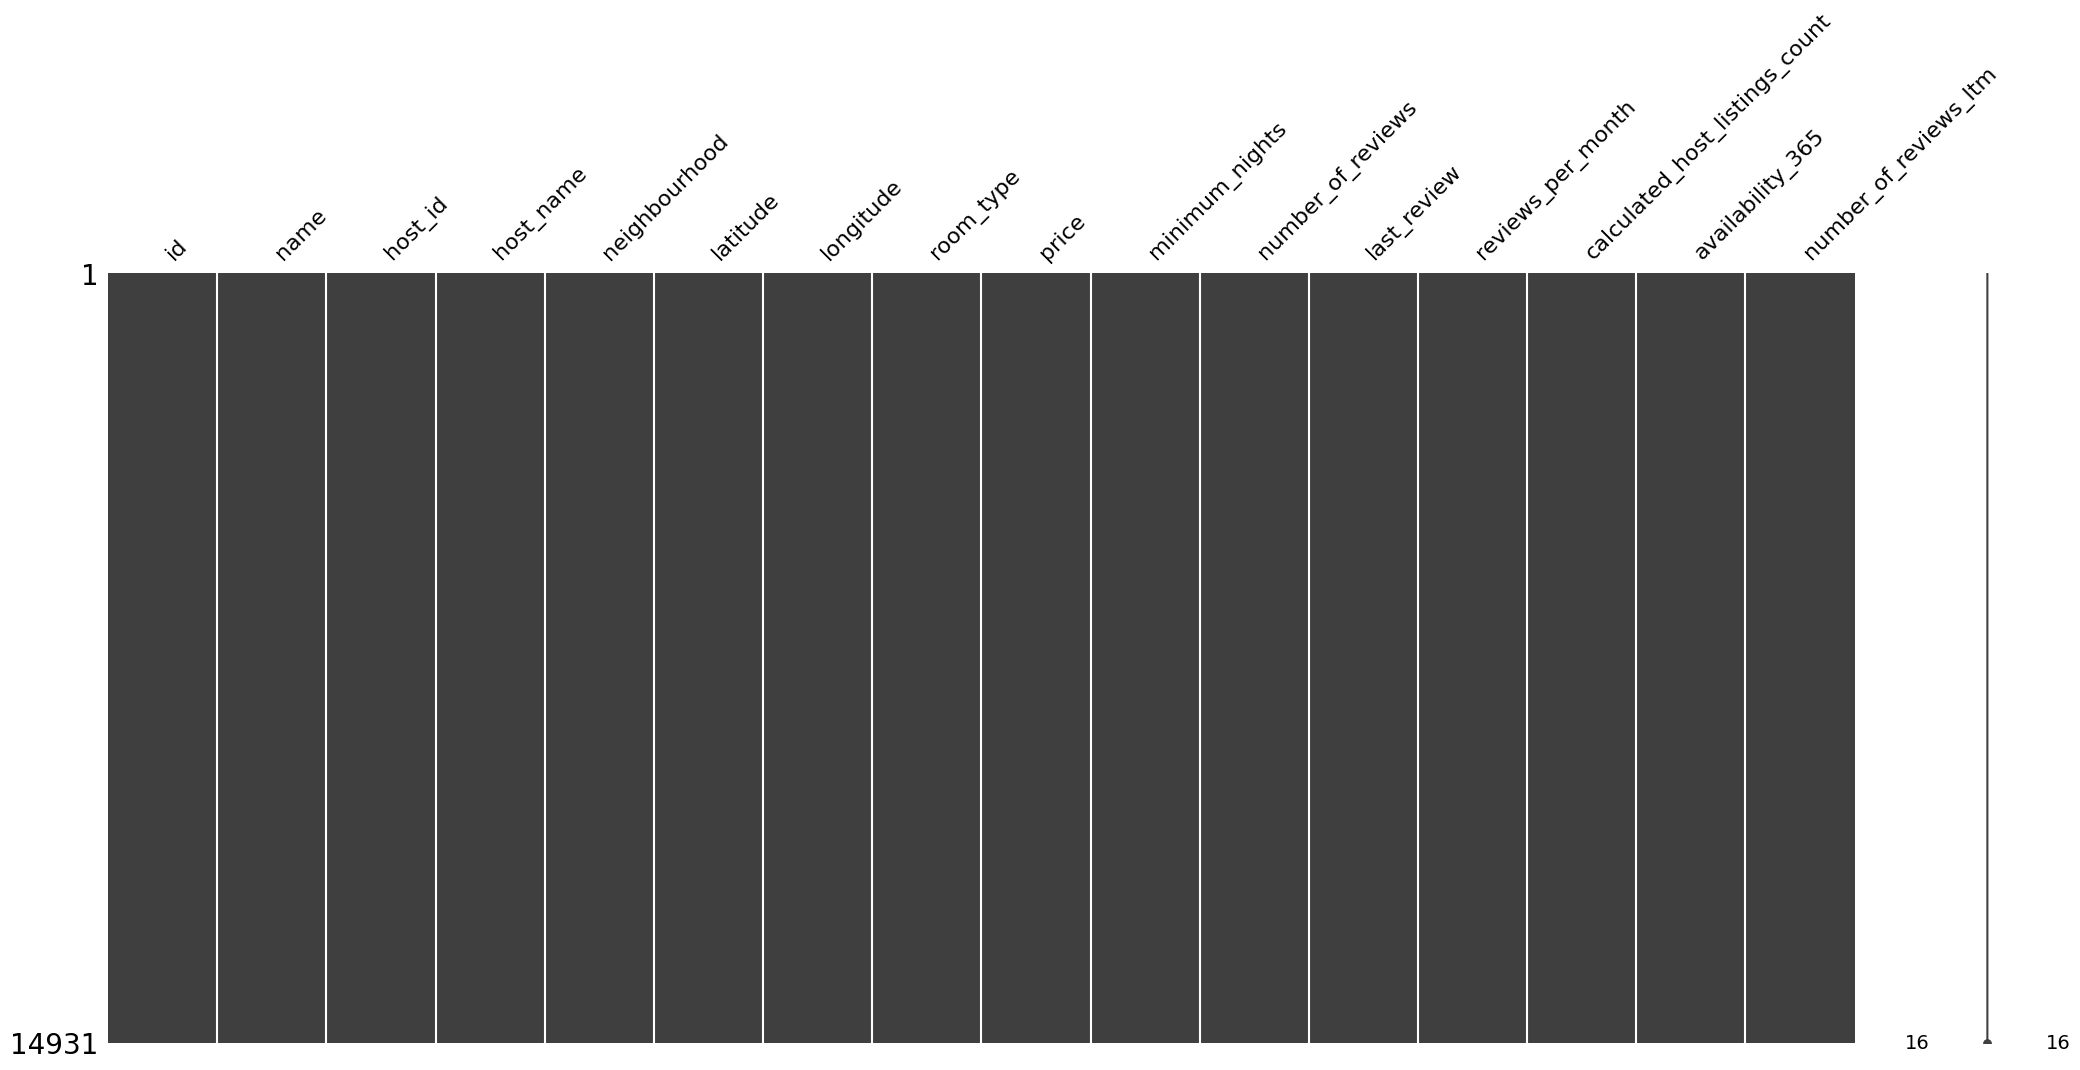

In [43]:
# prompt: missingno matrix for airbnb_data_cleaned

import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

# Assuming airbnb_data_cleaned is your DataFrame
# Replace with your actual DataFrame if named differently

# Create the missingno matrix
msno.matrix(airbnb_data_cleaned)
plt.show()

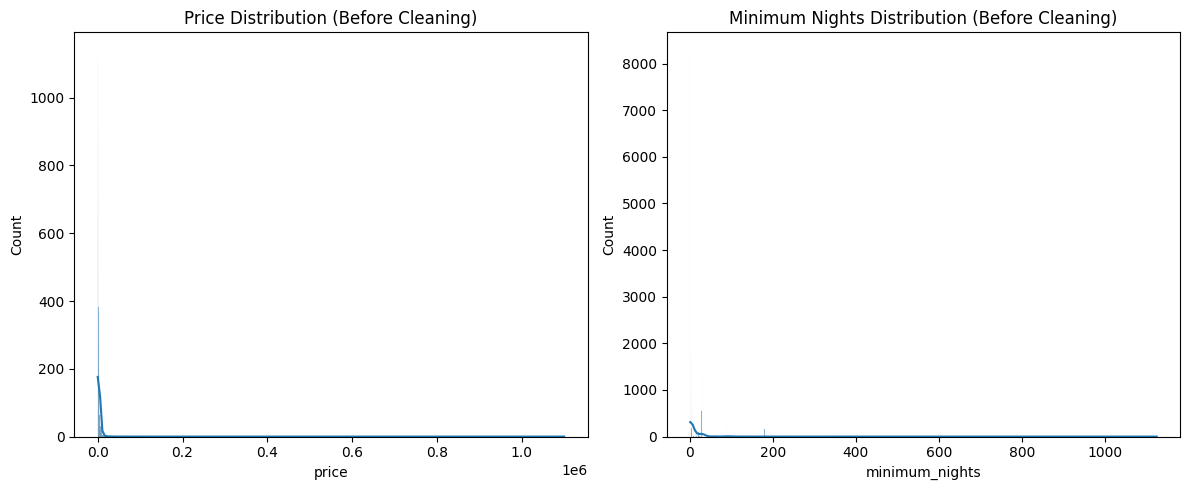

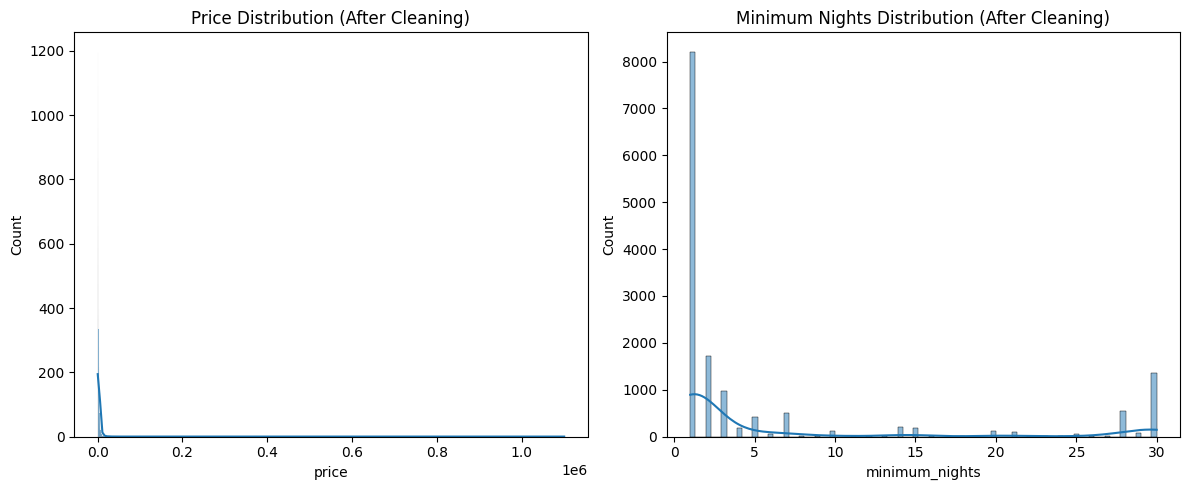

In [44]:
# prompt: display histogram for price and histogram for minimum_nights using airbnb_data as before, and airbnb_data_cleaned as after

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming airbnb_data and airbnb_data_cleaned are defined as in your original code

# Before cleaning
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(airbnb_data['price'], kde=True)
plt.title('Price Distribution (Before Cleaning)')

plt.subplot(1, 2, 2)
sns.histplot(airbnb_data['minimum_nights'], kde=True)
plt.title('Minimum Nights Distribution (Before Cleaning)')
plt.tight_layout()
plt.show()


# After cleaning
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(airbnb_data_cleaned['price'], kde=True)
plt.title('Price Distribution (After Cleaning)')

plt.subplot(1, 2, 2)
sns.histplot(airbnb_data_cleaned['minimum_nights'], kde=True)
plt.title('Minimum Nights Distribution (After Cleaning)')
plt.tight_layout()
plt.show()

In [45]:
airbnb_data_cleaned.describe()

latitude     longitude         price  minimum_nights  \
count  14931.000000  14931.000000  1.493100e+04    14931.000000   
mean      13.745457    100.559841  3.084544e+03        6.283169   
std        0.042913      0.051263  2.264543e+04        9.815753   
min       13.527300    100.329550  2.780000e+02        1.000000   
25%       13.720447    100.529795  9.000000e+02        1.000000   
50%       13.738690    100.561180  1.452000e+03        1.000000   
75%       13.759585    100.585040  2.499500e+03        5.000000   
max       13.953540    100.923440  1.100000e+06       30.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       14931.000000       14931.000000                    14931.000000   
mean           17.138504           0.535389                       14.036769   
std            41.340495           0.972508                       30.339235   
min             0.000000           0.000000                        1.000000   
25%             0.000000           0.000000                        1.000000   
50%             2.000000           0.100000                        4.000000   
75%            14.000000           0.720000                       13.000000   
max          1224.000000          19.130000                      228.000000   

       availability_365  number_of_reviews_ltm  
count      14931.000000           14931.000000  
mean         242.262742               3.660773  
std          126.080615               9.143299  
min            0.000000               0.000000  
25%          134.000000               0.000000  
50%          305.000000               0.000000  
75%          360.000000               3.000000  
max          365.000000             325.000000

In [46]:
airbnb_data.describe()

id       host_id      latitude     longitude         price  \
count  1.585400e+04  1.585400e+04  15854.000000  15854.000000  1.585400e+04   
mean   1.579397e+17  1.541058e+08     13.745144    100.559903  3.217704e+03   
std    2.946015e+17  1.318726e+08      0.043040      0.050911  2.497212e+04   
min    2.793400e+04  5.892000e+04     13.527300    100.329550  0.000000e+00   
25%    2.104509e+07  3.974431e+07     13.720090    100.529690  9.000000e+02   
50%    3.503734e+07  1.224556e+08     13.738490    100.561415  1.429000e+03   
75%    5.256154e+07  2.390547e+08     13.759497    100.585150  2.429000e+03   
max    7.908162e+17  4.926659e+08     13.953540    100.923440  1.100000e+06   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    15854.000000       15854.000000       10064.000000   
mean        15.292355          16.654157           0.813145   
std         50.815020          40.613331           1.090196   
min          1.000000           0.000000           0.010000   
25%          1.000000           0.000000           0.120000   
50%          1.000000           2.000000           0.435000   
75%          7.000000          13.000000           1.060000   
max       1125.000000        1224.000000          19.130000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15854.000000      15854.000000           15854.000000  
mean                        13.889618        244.378643               3.481519  
std                         30.269848        125.843224               8.916937  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        138.000000               0.000000  
50%                          4.000000        309.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000

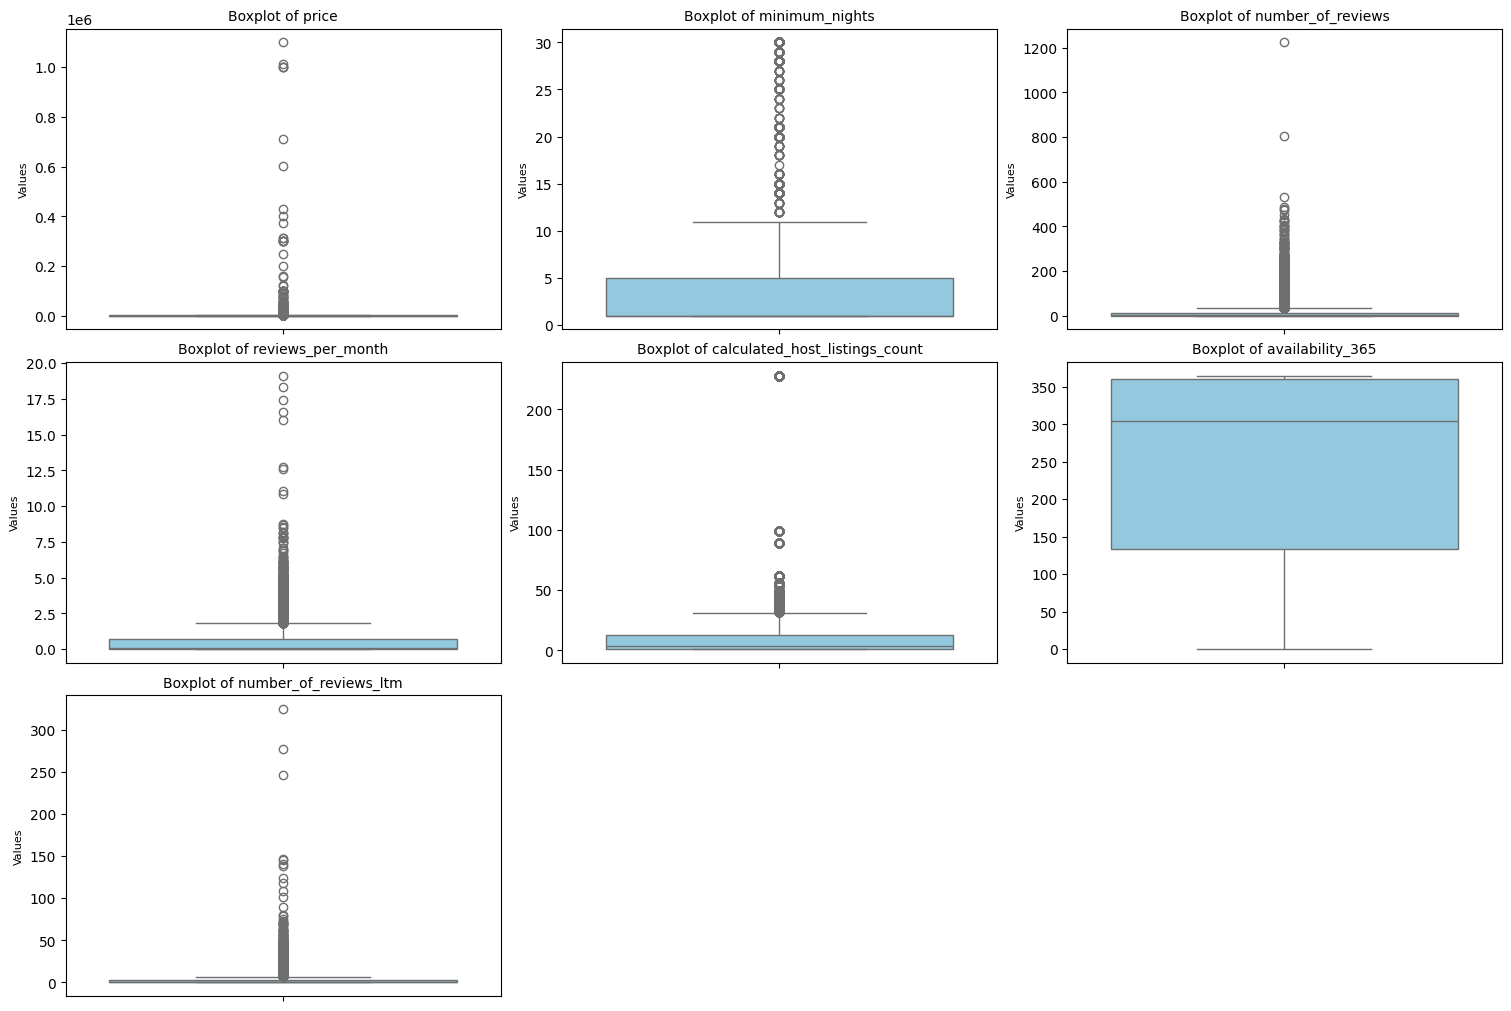

In [47]:
# prompt: generate boxplot for airbnb_data_cleaned

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming airbnb_data_cleaned is your DataFrame
# Replace with your actual DataFrame if named differently

def plot_boxplots(df, cols):
    # Set up the grid layout
    num_cols = 3  # Number of columns for subplots
    num_rows = (len(cols) + num_cols - 1) // num_cols  # Calculate rows dynamically
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10), constrained_layout=True)

    # Loop through columns and create individual boxplots
    for i, col in enumerate(cols):
        ax = axes[i // num_cols, i % num_cols]  # Get the correct axis
        sns.boxplot(data=df[col], ax=ax, color='skyblue')  # Single boxplot with custom color
        ax.set_title(f'Boxplot of {col}', fontsize=10)  # Set title
        ax.set_xlabel('')  # Clear x-axis label
        ax.set_ylabel('Values', fontsize=8)  # Set y-axis label for scale

    # Remove empty subplots
    for i in range(len(cols), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.show()

numeric_cols = ['price', 'minimum_nights', 'number_of_reviews',
                'reviews_per_month', 'calculated_host_listings_count',
                'availability_365', 'number_of_reviews_ltm']

plot_boxplots(airbnb_data_cleaned, numeric_cols)

In [48]:
# prompt: remove outliers for price in airbnb_data_cleaned with value above 600000

# Assuming airbnb_data_cleaned is your DataFrame
# Replace with your actual DataFrame if named differently

# Remove outliers for price above 600000
airbnb_data_cleaned = airbnb_data_cleaned[airbnb_data_cleaned['price'] <= 600000]

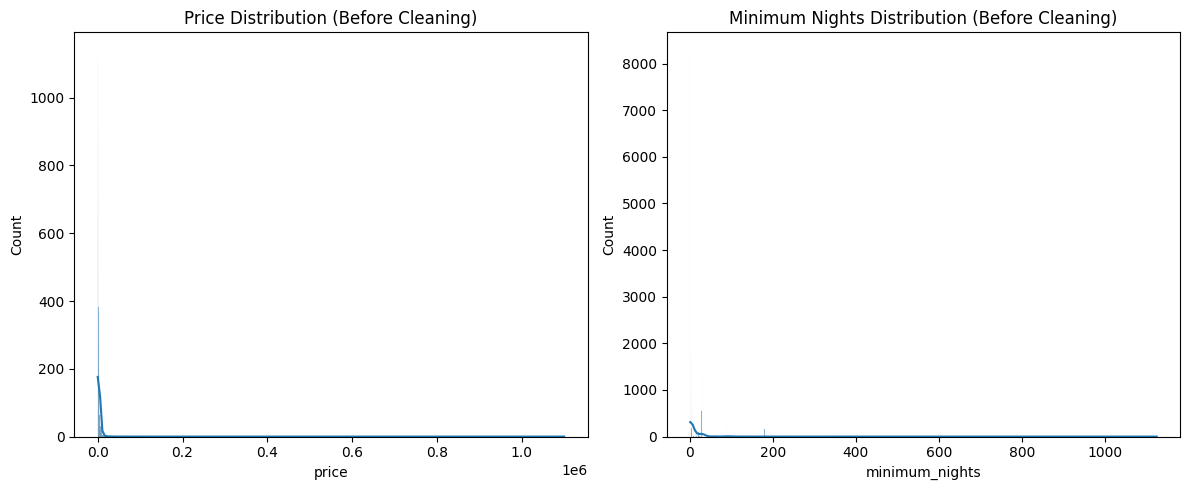

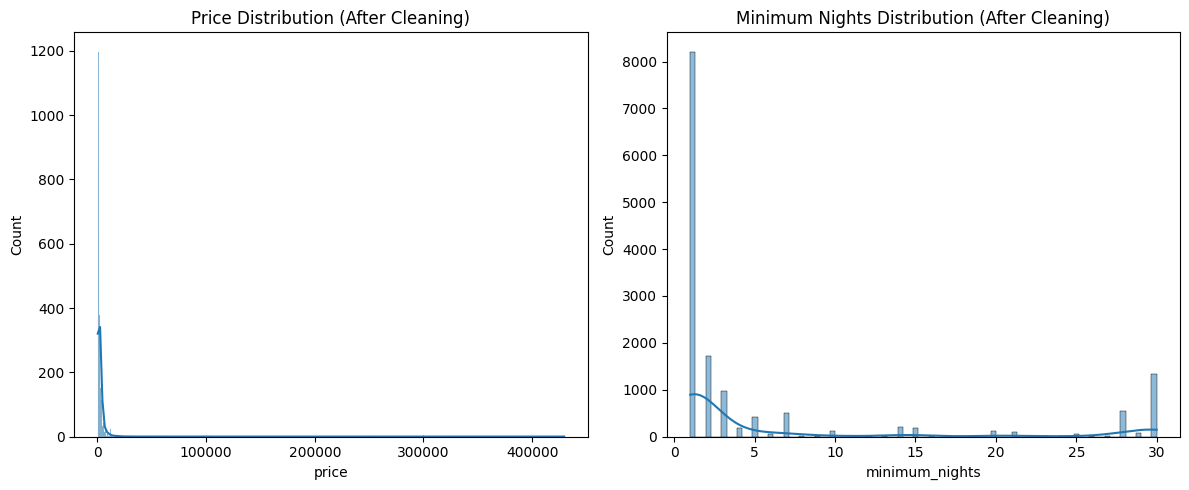

In [49]:
# prompt: display histogram for price and histogram for minimum_nights using airbnb_data as before, and airbnb_data_cleaned as after

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming airbnb_data and airbnb_data_cleaned are defined as in your original code

# Before cleaning
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(airbnb_data['price'], kde=True)
plt.title('Price Distribution (Before Cleaning)')

plt.subplot(1, 2, 2)
sns.histplot(airbnb_data['minimum_nights'], kde=True)
plt.title('Minimum Nights Distribution (Before Cleaning)')
plt.tight_layout()
plt.show()


# After cleaning
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(airbnb_data_cleaned['price'], kde=True)
plt.title('Price Distribution (After Cleaning)')

plt.subplot(1, 2, 2)
sns.histplot(airbnb_data_cleaned['minimum_nights'], kde=True)
plt.title('Minimum Nights Distribution (After Cleaning)')
plt.tight_layout()
plt.show()

## Verifying Cleaned Data

In [50]:
# prompt: generate overall data, and print shape before cleaning using airbnb_data, and print shape after cleaning using airbnb_data_cleaned. print how many rows are removed before and after. also show percentage

# Assuming airbnb_data and airbnb_data_cleaned are defined as in your original code

print("Original Data Shape:", airbnb_data.shape)
print("Cleaned Data Shape:", airbnb_data_cleaned.shape)

rows_removed = airbnb_data.shape[0] - airbnb_data_cleaned.shape[0]
print(f"\nRows removed: {rows_removed}")
percentage_removed = (rows_removed / airbnb_data.shape[0]) * 100
print(f"Percentage of rows removed: {percentage_removed:.2f}%")

Original Data Shape: (15854, 16)
Cleaned Data Shape: (14924, 16)

Rows removed: 930
Percentage of rows removed: 5.87%


In [51]:
# prompt: airbnb_data_cleaned describe

airbnb_data_cleaned.describe()

latitude     longitude          price  minimum_nights  \
count  14924.000000  14924.000000   14924.000000    14924.000000   
mean      13.745460    100.559845    2655.394130        6.280421   
std        0.042918      0.051268   10313.754401        9.814371   
min       13.527300    100.329550     278.000000        1.000000   
25%       13.720448    100.529798     900.000000        1.000000   
50%       13.738690    100.561180    1451.000000        1.000000   
75%       13.759583    100.585040    2499.000000        5.000000   
max       13.953540    100.923440  429443.000000       30.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       14924.000000       14924.000000                    14924.000000   
mean           17.140244           0.535497                       14.041142   
std            41.347088           0.972674                       30.345612   
min             0.000000           0.000000                        1.000000   
25%             0.000000           0.000000                        1.000000   
50%             2.000000           0.100000                        4.000000   
75%            14.000000           0.720000                       13.000000   
max          1224.000000          19.130000                      228.000000   

       availability_365  number_of_reviews_ltm  
count      14924.000000           14924.000000  
mean         242.269365               3.662356  
std          126.080552               9.145139  
min            0.000000               0.000000  
25%          134.000000               0.000000  
50%          305.000000               0.000000  
75%          360.000000               3.000000  
max          365.000000             325.000000

After the data cleaning process, the shape of the dataset change from the Original Data Shape: (15854 rows, 16 columns) into the Cleaned Data Shape: (14924 rows, 16 columns).

- The total number of rows removed after data cleaning is 930 rows.
- Percentage of rows removed is 5.87%.

In [52]:
# prompt: save airbnb_data_cleaned to csv file

airbnb_data_cleaned.to_csv('airbnb_data_cleaned.csv', index=False)

# Data Analysis

## Cleaned Data Understanding

In [53]:
# Display DataFrame info
print("DataFrame Information:")
airbnb_data_cleaned.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
Index: 14924 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14924 non-null  object 
 1   name                            14924 non-null  object 
 2   host_id                         14924 non-null  object 
 3   host_name                       14924 non-null  object 
 4   neighbourhood                   14924 non-null  object 
 5   latitude                        14924 non-null  float64
 6   longitude                       14924 non-null  float64
 7   room_type                       14924 non-null  object 
 8   price                           14924 non-null  int64  
 9   minimum_nights                  14924 non-null  int64  
 10  number_of_reviews               14924 non-null  int64  
 11  last_review                     14924 non-null  object 
 12  reviews_per_mo

In [54]:
airbnb_data_cleaned.describe()

latitude     longitude          price  minimum_nights  \
count  14924.000000  14924.000000   14924.000000    14924.000000   
mean      13.745460    100.559845    2655.394130        6.280421   
std        0.042918      0.051268   10313.754401        9.814371   
min       13.527300    100.329550     278.000000        1.000000   
25%       13.720448    100.529798     900.000000        1.000000   
50%       13.738690    100.561180    1451.000000        1.000000   
75%       13.759583    100.585040    2499.000000        5.000000   
max       13.953540    100.923440  429443.000000       30.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       14924.000000       14924.000000                    14924.000000   
mean           17.140244           0.535497                       14.041142   
std            41.347088           0.972674                       30.345612   
min             0.000000           0.000000                        1.000000   
25%             0.000000           0.000000                        1.000000   
50%             2.000000           0.100000                        4.000000   
75%            14.000000           0.720000                       13.000000   
max          1224.000000          19.130000                      228.000000   

       availability_365  number_of_reviews_ltm  
count      14924.000000           14924.000000  
mean         242.269365               3.662356  
std          126.080552               9.145139  
min            0.000000               0.000000  
25%          134.000000               0.000000  
50%          305.000000               0.000000  
75%          360.000000               3.000000  
max          365.000000             325.000000

In [55]:
# prompt: check normality test with d'agostino for airbnb_data_cleaned

import pandas as pd
from scipy.stats import normaltest

# Load the cleaned data
airbnb_data_cleaned = pd.read_csv('airbnb_data_cleaned.csv')

# Select numerical columns for normality testing (exclude non-numeric columns)
numeric_cols = airbnb_data_cleaned.select_dtypes(include=['number']).columns

# Perform the normality test for each numerical column
for col in numeric_cols:
    k2, p = normaltest(airbnb_data_cleaned[col])
    print(f"Normality test for {col}:")
    print(f"  K^2 statistic: {k2}")
    print(f"  P-value: {p}")
    alpha = 0.05  # significance level
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f"  The null hypothesis can be rejected. The data in '{col}' does not appear to be normally distributed.")
    else:
        print(f"  The null hypothesis cannot be rejected. The data in '{col}' may come from a normal distribution.")
    print("-" * 20)

Normality test for id:
  K^2 statistic: 2672.999520387095
  P-value: 0.0
  The null hypothesis can be rejected. The data in 'id' does not appear to be normally distributed.
--------------------
Normality test for host_id:
  K^2 statistic: 1323.5693650702412
  P-value: 3.895508594946095e-288
  The null hypothesis can be rejected. The data in 'host_id' does not appear to be normally distributed.
--------------------
Normality test for latitude:
  K^2 statistic: 4208.637878447922
  P-value: 0.0
  The null hypothesis can be rejected. The data in 'latitude' does not appear to be normally distributed.
--------------------
Normality test for longitude:
  K^2 statistic: 1989.7339186461063
  P-value: 0.0
  The null hypothesis can be rejected. The data in 'longitude' does not appear to be normally distributed.
--------------------
Normality test for price:
  K^2 statistic: 36766.805594258025
  P-value: 0.0
  The null hypothesis can be rejected. The data in 'price' does not appear to be normally 

In [56]:
# prompt: count unique value for all categorical data in airbnb_data_cleaned

import pandas as pd

# Assuming airbnb_data_cleaned is already loaded as a pandas DataFrame
# Replace 'your_file.csv' with the actual file path if needed
# airbnb_data_cleaned = pd.read_csv('airbnb_data_cleaned.csv')

# Select categorical columns
categorical_cols = airbnb_data_cleaned.select_dtypes(include=['object']).columns

# Iterate through categorical columns and count unique values
for col in categorical_cols:
    unique_count = airbnb_data_cleaned[col].nunique()
    print(f"Column '{col}': {unique_count} unique values")

Column 'name': 13927 unique values
Column 'host_name': 5019 unique values
Column 'neighbourhood': 50 unique values
Column 'room_type': 4 unique values
Column 'last_review': 1597 unique values


## Getting Into Proposed Analysis

### id Analysis

In [57]:
# prompt: count distinct column id in airbnb_dataset_cleaned

# Assuming airbnb_data_cleaned is already loaded as a pandas DataFrame.
# Replace 'airbnb_data_cleaned.csv' with the correct file path if necessary.
# airbnb_data_cleaned = pd.read_csv('airbnb_data_cleaned.csv')

distinct_id_count = airbnb_data_cleaned['id'].nunique()
print(f"Number of distinct IDs in 'id' column: {distinct_id_count}")

Number of distinct IDs in 'id' column: 14924


### Count listings per host

In [58]:
listings_per_host = airbnb_data_cleaned.groupby('host_id')['id'].count().sort_values(ascending=False)
print(listings_per_host)

host_id
201677068    215
52161947      97
26736483      89
228535635     62
68154488      61
            ... 
124664373      1
124672056      1
124679689      1
124683404      1
492665929      1
Name: id, Length: 6212, dtype: int64


In [59]:
# prompt: top 20 listings_per_host

# Assuming airbnb_data_cleaned is already loaded as a pandas DataFrame.
# Replace 'airbnb_data_cleaned.csv' with the correct file path if necessary.
# airbnb_data_cleaned = pd.read_csv('airbnb_data_cleaned.csv')

listings_per_host = airbnb_data_cleaned.groupby('host_id')['id'].count().sort_values(ascending=False)
top_20_listings = listings_per_host.head(20)
top_20_listings

host_id
201677068    215
52161947      97
26736483      89
228535635     62
68154488      61
62257044      56
8444643       52
312545246     49
89820474      48
66923696      47
314945555     46
402093105     45
8663142       45
434168399     44
34795931      44
79624768      44
264864968     42
44305808      41
347302995     39
40262107      38
Name: id, dtype: int64

In [60]:
# prompt: top_20_listings with host_name

# Assuming airbnb_data_cleaned is already loaded as a pandas DataFrame.
# Replace 'airbnb_data_cleaned.csv' with the correct file path if necessary.
# airbnb_data_cleaned = pd.read_csv('airbnb_data_cleaned.csv')

listings_per_host = airbnb_data_cleaned.groupby('host_id')['id'].nunique().sort_values(ascending=False)
top_20_listings = listings_per_host.head(20)

# Merge with original DataFrame to get host names
top_20_listings_with_host_name = pd.merge(top_20_listings, airbnb_data_cleaned[['host_id', 'host_name']], on='host_id', how='left').drop_duplicates(subset='host_id')

top_20_listings_with_host_name

host_id   id      host_name
0     201677068  215          Curry
215    52161947   97          Noons
312    26736483   89              K
401   228535635   62       Pornchai
463    68154488   61        Dusadee
524    62257044   56       Ludoping
580     8444643   52      Kiattisak
632   312545246   49           Mike
681    89820474   48      Ken-Bambu
729    66923696   47          Panda
776   314945555   46           Nana
822   402093105   45     Hi Gravity
867     8663142   45  ISanook Hotel
912   434168399   44       Krittika
956    34795931   44            Kim
1000   79624768   44            Eva
1044  264864968   42         Tricia
1086   44305808   41   Lek Boonsiri
1127  347302995   39         Sophia
1166   40262107   38          Patty

In [61]:
import plotly.express as px
import pandas as pd

# ... (previous code) ...

# Calculate the median of 'reviews_per_month' for each host
median_reviews_per_month = airbnb_data_cleaned.groupby('host_id')['reviews_per_month'].median()

# Convert 'host_id' in median_reviews_per_month to string to match the type in top_20_listings_with_host_name
median_reviews_per_month.index = median_reviews_per_month.index.astype(str)

# Merge median reviews_per_month into top_20_listings_with_host_name
# Ensure both 'host_id' columns have the same data type (object in this case)
top_20_listings_with_host_name = pd.merge(top_20_listings_with_host_name.astype({'host_id': str}),
                                          median_reviews_per_month,
                                          on='host_id',
                                          how='left')


fig = px.bar(top_20_listings_with_host_name,
             x='id',
             y='host_name',
             orientation='h',  # Horizontal bar plot
             color='host_name',  # Color by host name
             hover_data=['host_id', 'reviews_per_month'],  # Show host_id and median reviews_per_month on hover
             title='Top 20 Host Name with Most Listings')

fig.update_layout(xaxis_title='Number of Listings', yaxis_title='Host Name')
fig.show()

In [62]:
# prompt: sort fig.update_layout by the highest median

# Sort top_20_listings_with_host_name by 'reviews_per_month' in descending order
top_20_listings_with_host_name_sorted = top_20_listings_with_host_name.sort_values(by='reviews_per_month', ascending=False)

fig = px.bar(top_20_listings_with_host_name_sorted,
             x='id',
             y='host_name',
             orientation='h',  # Horizontal bar plot
             color='host_name',  # Color by host name
             hover_data=['host_id', 'reviews_per_month'],  # Show host_id and median reviews_per_month on hover
             title='Top 20 Host Name with Most Listings (Sorted by Median Reviews per Month)')

fig.update_layout(xaxis_title='Number of Listings', yaxis_title='Host Name')
fig.show()

From the insights above we can conclude blabla

## Descriptive Stats for Hosts

##Lek Boonsiri

### Sorted reviews_per_month for Lek Boonsiri

In [63]:
# prompt: Shows all reviews_per_month for id with host_name "lek boonsiri"

# Assuming airbnb_data_cleaned is already loaded as a pandas DataFrame
# Replace 'airbnb_data_cleaned.csv' with the correct file path if necessary.
# airbnb_data_cleaned = pd.read_csv('airbnb_data_cleaned.csv')

# Filter the DataFrame to include only entries with host_name "lek boonsiri"
lek_boonsiri_data = airbnb_data_cleaned[airbnb_data_cleaned['host_id'] == 44305808]

# Display the 'reviews_per_month' column for the filtered data
lek_boonsiri_data['reviews_per_month'].sort_values(ascending=False)

7560    0.39
1091    0.10
2934    0.04
7558    0.03
3048    0.02
3049    0.02
3051    0.02
3052    0.02
4843    0.00
2949    0.00
3001    0.00
5877    0.00
4925    0.00
2940    0.00
7561    0.00
7576    0.00
7578    0.00
7579    0.00
7589    0.00
7597    0.00
2941    0.00
2939    0.00
2918    0.00
2928    0.00
2921    0.00
2922    0.00
2923    0.00
2924    0.00
2925    0.00
2926    0.00
2927    0.00
2929    0.00
2938    0.00
2930    0.00
2931    0.00
2932    0.00
2933    0.00
2935    0.00
2936    0.00
2937    0.00
7881    0.00
Name: reviews_per_month, dtype: float64

### Lek Boonsiri Data

In [64]:
# prompt: Show all rows with host_name "lek boonsiri"

# Assuming airbnb_data_cleaned is already loaded as a pandas DataFrame
# Replace 'airbnb_data_cleaned.csv' with the correct file path if necessary.
# airbnb_data_cleaned = pd.read_csv('airbnb_data_cleaned.csv')

# Filter the DataFrame to include only entries with host_name "lek boonsiri"
lek_boonsiri_data = airbnb_data_cleaned[airbnb_data_cleaned['host_id'] == 44305808]

# Display all rows for the filtered data
lek_boonsiri_data.sort_values(by=['reviews_per_month', 'room_type', 'last_review'], ascending=False)

id                                               name   host_id  \
7560  35562164                      Deluxe Room near Night Market  44305808   
1091   8410736          2 connecting rooms ( family room 4-5 pax)  44305808   
2934  18202566   Sabai Sabai Hotel, 12KM FROM SIAM PARK, ROOM 304  44305808   
7558  35561272                 Deluxe Room The Near BTS Sky Train  44305808   
3048  17932458  Executive suite #501 with king bed, Sukhumvit ...  44305808   
3051  17933279                    Sky Garden#601  honeymoon suite  44305808   
3049  17932736  Oriental # 602, bed,Sabai Sabai Hotel , On-nut...  44305808   
3052  17933415        Honeymoon Sky Garden#605 with king bedroom.  44305808   
2922  18202532  HOTEL NEAR EKAMAI INTERNATIONAL SCHOOL - ROOM 504  44305808   
2923  18202535  HOTEL NEAR ST. ANDREWS INTERNATIONAL SCHOOL- R...  44305808   
2924  18202537        Comfortable room deluxe 404, Sukhumvit road  44305808   
2925  18202541       5-10 mins by motobike/taxi to Ekkamai Soi 10  44305808   
7561  35562840                 Deluxe Room  Near The Night Market  44305808   
7576  35582662                              Deluxe Room Red Style  44305808   
7578  35583034                               Deluxe Room Twin Bed  44305808   
7579  35583043                           Deluxe Room Near Ekkamai  44305808   
2918  18198198  Beautiful corner suite 401, King bed, Sukhumvi...  44305808   
2921  18202526       HOTEL NEAR THE BIG C RAMKKAMHEANG - ROOM 503  44305808   
2926  18202543     HOTEL NEAR KASEM POLYTECHNIC SCHOOL - ROOM 406  44305808   
2927  18202544       HOTEL NEAR BANGKOK HOSPITAL-DELUXE- ROOM 407  44305808   
2928  18202545            HOTEL NEAR KLONG TON HOSPITAL- ROOM 408  44305808   
2929  18202547                   HOTEL NEAR THE UM TOWER ROOM 409  44305808   
2930  18202548                  HOTEL NEAR THE PB TOWER- ROOM 410  44305808   
2931  18202551           HOTEL NEAR THE AMERICAN SCHOOL- ROOM 411  44305808   
2932  18202552  Corner suite # 301, king bed, Onnut-Sukhumvit rd.  44305808   
2933  18202563          Deluxe Queen bedroom# 303, Sukhumvit road  44305808   
2935  18202571           Colorful room Deluxe 305, Sukhumvit road  44305808   
2936  18202574  HOTEL NEAR BIG C AND TESCO LOTES ONNUT - ROOM 306  44305808   
2937  18202575  8KM FROM SHOPPING MALL TERMINAL 21 ASOK - ROOM...  44305808   
2938  18202577     Boutique hotel BITEC CENTRE BANGKOK - ROOM 308  44305808   
2939  18202578     Comfy 2 singles bedroom,#309 near bus terminal  44305808   
2940  18202579        Nice Deluxe # 310 2 Single bed Sukhumvit RD  44305808   
2941  18202580           RESORT STYLE HOTEL Near Phra Khanong BTS  44305808   
2949  18202755                      2 bedrooms, Corner suite# 402  44305808   
3001  17881967   5mins to BTS-A quiet hotel near Thonglor/Ekkamai  44305808   
4843  26171773               10-15 mins ride to Thong Lor/Ekkamai  44305808   
4925  26370136                                           Room 506  44305808   
5877  30356698                             little honeymoon suite  44305808   
7589  35584868                 Honey moon Room Near BTS Sky Train  44305808   
7597  35595298                 Oriental Suite, Near Airport Line.  44305808   
7881  36363086                                        Family Room  44305808   

         host_name neighbourhood  latitude  longitude     room_type  price  \
7560  Lek Boonsiri       Vadhana  13.71879  100.58662  Private room   1023   
1091  Lek Boonsiri       Vadhana  13.73225  100.59628    Hotel room   2386   
2934  Lek Boonsiri       Vadhana  13.73228  100.59840    Hotel room   1057   
7558  Lek Boonsiri       Vadhana  13.72085  100.58588    Hotel room   1051   
3048  Lek Boonsiri       Vadhana  13.73143  100.59971    Hotel room   1700   
3051  Lek Boonsiri       Vadhana  13.73051  100.59893    Hotel room   1800   
3049  Lek Boonsiri       Vadhana  13.72918  100.59996    Hotel room   1860   
3052  Lek Boonsiri       Vadhana  13.73035  100.59902    Hotel room  

###Descriptive stats for Lek Boonsiri

In [65]:
# Filter for host_name "Lek Boonsiri"
lek_boonsiri_listings = airbnb_data_cleaned[airbnb_data_cleaned['host_id'] == 44305808]

lek_boonsiri_listings.describe()

id     host_id   latitude   longitude        price  \
count  4.100000e+01        41.0  41.000000   41.000000    41.000000   
mean   2.245259e+07  44305808.0  13.730312  100.596649  1328.902439   
std    7.711013e+06         0.0   0.004157    0.004518   406.393393   
min    8.410736e+06  44305808.0  13.718790  100.585880   977.000000   
25%    1.820254e+07  44305808.0  13.730510  100.597940  1063.000000   
50%    1.820257e+07  44305808.0  13.732300  100.598420  1126.000000   
75%    2.637014e+07  44305808.0  13.732360  100.598460  1600.000000   
max    3.636309e+07  44305808.0  13.733850  100.602110  2414.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count       41.000000          41.000000          41.000000   
mean         1.536585           0.365854           0.015610   
std          3.279463           1.156635           0.062492   
min          1.000000           0.000000           0.000000   
25%          1.000000           0.000000           0.000000   
50%          1.000000           0.000000           0.000000   
75%          1.000000           0.000000           0.000000   
max         22.000000           7.000000           0.390000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                            41.0         41.000000              41.000000  
mean                             41.0        344.243902               0.024390  
std                               0.0         63.707841               0.156174  
min                              41.0         89.000000               0.000000  
25%                              41.0        364.000000               0.000000  
50%                              41.0        365.000000               0.000000  
75%                              41.0        365.000000               0.000000  
max                              41.0        365.000000               1.000000

### Lek Boonsiri Unique Categorical Data

In [66]:
# prompt: count unique values for categorical data in lek_boonsiri_data

# Assuming airbnb_data_cleaned is already loaded as a pandas DataFrame
# Replace 'airbnb_data_cleaned.csv' with the correct file path if necessary.
# airbnb_data_cleaned = pd.read_csv('airbnb_data_cleaned.csv')

# Filter the DataFrame to include only entries with host_name "lek boonsiri"
lek_boonsiri_data = airbnb_data_cleaned[airbnb_data_cleaned['host_id'] == 44305808]

# Select categorical columns for lek_boonsiri_data
categorical_cols = lek_boonsiri_data.select_dtypes(include=['object']).columns

# Iterate through categorical columns and count unique values
for col in categorical_cols:
    unique_count = lek_boonsiri_data[col].nunique()
    print(f"Column '{col}': {unique_count} unique values")

Column 'name': 41 unique values
Column 'host_name': 1 unique values
Column 'neighbourhood': 1 unique values
Column 'room_type': 2 unique values
Column 'last_review': 9 unique values


## Mike

### Sorted reviews_per_month for Mike

In [67]:
# prompt: Shows all reviews_per_month for "id" with host_name "Mike" using group by id

import pandas as pd

# Load the cleaned data
airbnb_data_cleaned = pd.read_csv('airbnb_data_cleaned.csv')

# Filter for host_name "Mike"
mike_listings = airbnb_data_cleaned[airbnb_data_cleaned['host_id'] == 312545246]

# Group by 'id' and show 'reviews_per_month'
reviews_per_month_by_id = mike_listings.groupby('id')['reviews_per_month'].sum()

reviews_per_month_by_id.sort_values(ascending=False)

id
757720203729400827    4.62
717042181450822204    4.02
747542278762782513    4.00
694605202521903820    3.92
599127544564690519    3.78
717069204956920428    3.67
747587771523895108    3.49
53243096              3.41
668414630834550798    3.36
603438520789848320    3.33
53244757              3.31
678537783189084406    3.28
696852086559011846    3.20
564126677488703250    3.11
757740515985493693    3.08
640990797575203244    3.03
747611005229848744    2.83
52725061              2.83
599109616072964220    2.76
717055166181117100    2.76
53250420              2.75
717077709349017688    2.73
53245040              2.73
53244374              2.62
696768868360194214    2.62
747516270720011552    2.59
563936486824601479    2.56
53250620              2.55
53250140              2.51
654696074899917851    2.44
53244918              2.42
53251118              2.35
640990832929071656    2.34
564169459872519228    2.26
747597226267095654    2.22
717085383289420707    2.14
727187440589106913    2.00
53245636              1.99
567070239745853360    1.97
53250913              1.70
41026318              1.64
564879108994452181    1.54
564142677791950174    1.35
40929486              1.34
628444950434402690    1.13
40927762              1.03
40437872              0.94
664017376002360307    0.84
788104649280595223    0.00
Name: reviews_per_month, dtype: float64

### Mike Data

In [68]:
# prompt: Show all rows with host_name "lek boonsiri"

# Assuming airbnb_data_cleaned is already loaded as a pandas DataFrame
# Replace 'airbnb_data_cleaned.csv' with the correct file path if necessary.
# airbnb_data_cleaned = pd.read_csv('airbnb_data_cleaned.csv')

# Filter the DataFrame to include only entries with host_name "lek boonsiri"
Mike_data = airbnb_data_cleaned[airbnb_data_cleaned['host_id'] == 312545246]

# Display all rows for the filtered data
Mike_data.sort_values(by='reviews_per_month', ascending=False)

id                                               name  \
13971  757720203729400827  40F!Perfect location# Pool#Gym@Sukhumvit 24(1209)   
13342  717042181450822204   Perfect location# Pool#Gym@BTS/MRT&2BR#5ppl(126)   
13849  747542278762782513    Perfect location# Pool#Gym@BTS/MRT&Max3ppl(122)   
13116  694605202521903820          10F73#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
11884  599127544564690519  Perfect location# Pool(50F)#Gym@Sukhumvit 24(557)   
13344  717069204956920428    Perfect location# Pool#Gym@BTS/MRT&Max3ppl(125)   
13850  747587771523895108    Perfect location# Pool#Gym@BTS/MRT&Max3ppl(124)   
11193            53243096           8F42#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
12509  668414630834550798   20F!Perfect location# Pool#Gym@Sukhumvit 24(965)   
11796  603438520789848320           6F28#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
11195            53244757           8F47#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
12565  678537783189084406   10F68#Gym&Pool&BTS Nana&MRT Sukhumvit&Max4&100m2   
12797  696852086559011846  9F101#Perfect location# Pool#Gym@BTS/MRT&2BR#5ppl   
11553  564126677488703250           6F23#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
13972  757740515985493693    Weekly! 38F! Luxury#Pool&Gym@Sukhumvit 24(1196)   
12218  640990797575203244         17F134#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
13855  747611005229848744   Perfect location# Pool#Gym@BTS/MRT&2BR#5ppl(123)   
11081            52725061   7F34#Monthly#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11883  599109616072964220  Perfect location# Pool(50F)#Gym@Sukhumvit 24(556)   
13343  717055166181117100   Perfect location# Pool#Gym@BTS/MRT&2BR#5ppl(128)   
11202            53250420           9F63#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
13345  717077709349017688    Perfect location# Pool#Gym@BTS/MRT&Max3ppl(127)   
11198            53245040           9F55#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11194            53244374           8F45#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
12795  696768868360194214   17F48#Perfect location# Pool#Gym@BTS/MRT&Max3ppl   
13846  747516270720011552  17F138#Gym&Pool&BTS Nana&MRT Sukhumvit&Max4&100m2   
11550  563936486824601479           6F22#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
11203            53250620  Monthly・10F69#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11201            53250140           9F62#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
12335  654696074899917851  39F!Perfect location# Pool#Gym@Sukhumvit 24(1197)   
11197            53244918           8F52#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11205            53251118          10F74#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
12219  640990832929071656         17F135#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
11556  564169459872519228           6F29#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
13853  747597226267095654   Perfect location# Pool#Gym@BTS/MRT&2BR#5ppl(121)   
13346  717085383289420707    Perfect location# Pool#Gym@BTS/MRT&Max3ppl(129)   
13562  727187440589106913   19F!Perfect location# Pool#Gym@Sukhumvit 24(953)   
11199            53245636           9F58#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11580  567070239745853360          7F37#Gym&Pool&BTS Nana&MRT Sukhumvit&Max4   
11204            53250913          10F72#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
9161             41026318   8F43#Monthly&Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11560  564879108994452181    Weekly・7F40#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
11554  564142677791950174           6F25#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
9188             40929486   8F44#Monthly#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11972  628444950434402690           9F54#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
9186             40927762     Monthly#12F85#Pool&BTS Nana&MRT Sukhumvit&4ppl   
9018             40437872   7F37#Weekly・Gym&Pool&BTS Nana&MRT Sukhumvit&Max4   
12553  664017376002360307           9F61#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
14778  788104649280595223  16F129#Gym&Pool&BTS Nana&MRT Sukhumvit&Max4&100m2   

         host_id host_

### Descriptive Stats for Mike

In [69]:
# Filter for host_name "Mike"
mike_listings = airbnb_data_cleaned[airbnb_data_cleaned['host_id'] == 312545246]

mike_listings.describe()

id      host_id   latitude   longitude        price  \
count  4.900000e+01         49.0  49.000000   49.000000    49.000000   
mean   4.532297e+17  312545246.0  13.741540  100.559651  3791.612245   
std    3.240525e+17          0.0   0.007923    0.005073  1402.212282   
min    4.043787e+07  312545246.0  13.723470  100.554660  2090.000000   
25%    5.325042e+07  312545246.0  13.738490  100.555388  2992.000000   
50%    6.034385e+17  312545246.0  13.745110  100.556810  3436.000000   
75%    7.170552e+17  312545246.0  13.746970  100.565760  3909.000000   
max    7.881046e+17  312545246.0  13.748770  100.567550  7251.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count       49.000000          49.000000          49.000000   
mean         1.755102          19.775510           2.552857   
std          1.146200          13.760247           0.935944   
min          1.000000           0.000000           0.000000   
25%          1.000000           8.000000           2.000000   
50%          1.000000          17.000000           2.620000   
75%          3.000000          30.000000           3.200000   
max          7.000000          59.000000           4.620000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                            49.0         49.000000              49.000000  
mean                             49.0         63.897959              17.448980  
std                               0.0         12.882878              10.764644  
min                              49.0         32.000000               0.000000  
25%                              49.0         56.000000               8.000000  
50%                              49.0         65.000000              15.000000  
75%                              49.0         74.000000              25.000000  
max                              49.0         87.000000              43.000000

### Mike Unique Categorical Data

In [70]:
# prompt: count unique values for categorical data in lek_boonsiri_data

# Assuming airbnb_data_cleaned is already loaded as a pandas DataFrame
# Replace 'airbnb_data_cleaned.csv' with the correct file path if necessary.
# airbnb_data_cleaned = pd.read_csv('airbnb_data_cleaned.csv')

# Filter the DataFrame to include only entries with host_name "Mike"
Mike_data = airbnb_data_cleaned[airbnb_data_cleaned['host_id'] == 312545246]

# Select categorical columns for lek_boonsiri_data
categorical_cols = Mike_data.select_dtypes(include=['object']).columns

# Iterate through categorical columns and count unique values
for col in categorical_cols:
    unique_count = Mike_data[col].nunique()
    print(f"Column '{col}': {unique_count} unique values")

Column 'name': 49 unique values
Column 'host_name': 1 unique values
Column 'neighbourhood': 3 unique values
Column 'room_type': 1 unique values
Column 'last_review': 27 unique values


## Locations of Listings

In [71]:
# Filter listings for each host
mike_listings = airbnb_data_cleaned[airbnb_data_cleaned['host_id'] == 312545246]
lek_listings = airbnb_data_cleaned[airbnb_data_cleaned['host_id'] == 44305808]

# Count listings per neighborhood
mike_neighbourhood_counts = mike_listings['neighbourhood'].value_counts()
lek_neighbourhood_counts = lek_listings['neighbourhood'].value_counts()

print("Mike's Listings by Neighbourhood:")
print(mike_neighbourhood_counts)
print("\nLek Boonsiri's Listings by Neighbourhood:")
print(lek_neighbourhood_counts)


Mike's Listings by Neighbourhood:
neighbourhood
Vadhana        37
Khlong Toei     8
Ratchathewi     4
Name: count, dtype: int64

Lek Boonsiri's Listings by Neighbourhood:
neighbourhood
Vadhana    41
Name: count, dtype: int64


In [72]:
import folium
from folium.plugins import MarkerCluster

# Create a base map of Bangkok
bangkok_map = folium.Map(location=[13.7563, 100.5018], zoom_start=11)

# Add Mike's listings to the map
marker_cluster_mike = MarkerCluster().add_to(bangkok_map)
for idx, row in mike_listings.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
        icon=folium.Icon(color='blue', icon='home')
    ).add_to(marker_cluster_mike)

# Add Lek's listings to the map
marker_cluster_lek = MarkerCluster().add_to(bangkok_map)
for idx, row in lek_listings.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
        icon=folium.Icon(color='red', icon='home')
    ).add_to(marker_cluster_lek)

# Display the map
bangkok_map

**Geographic Distribution**
- Location Mapping shows that both hosts have listings concentrated in Bangkok, with Mike's properties clustered in desirable areas like **Vadhana** and **Khlong Toei.**
- Lek's properties are also in **Vadhana**, but the difference in performance suggests other factors at play.

## Pricing Strategies

In [73]:
mike_avg_price = mike_listings['price'].median()
lek_avg_price = lek_listings['price'].median()

print(f"Mike's Average Price: {mike_avg_price:.2f} Baht")
print(f"Lek's Average Price: {lek_avg_price:.2f} Baht")

Mike's Average Price: 3436.00 Baht
Lek's Average Price: 1126.00 Baht


<ipython-input-74-ddf23bae50f1>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-74-ddf23bae50f1>:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




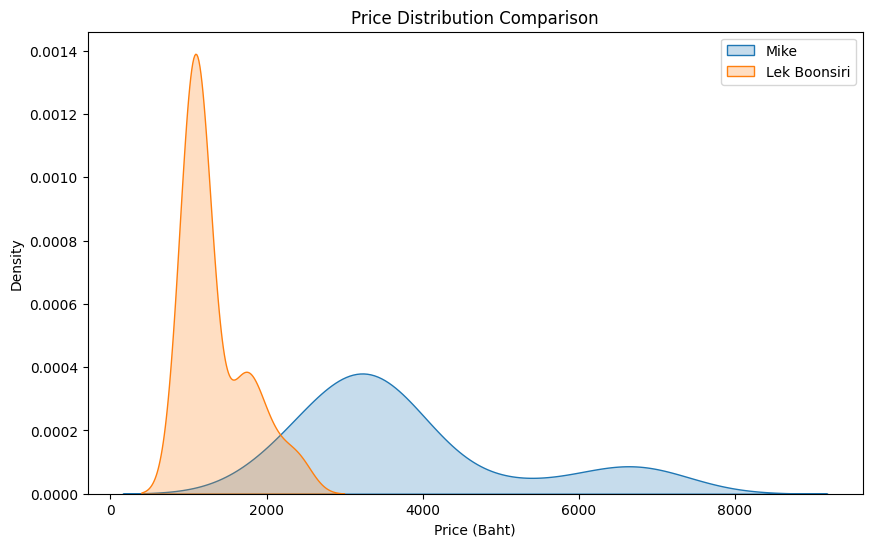

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(mike_listings['price'], label='Mike', shade=True)
sns.kdeplot(lek_listings['price'], label='Lek Boonsiri', shade=True)
plt.title('Price Distribution Comparison')
plt.xlabel('Price (Baht)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [75]:
neighbourhood_avg_prices = airbnb_data_cleaned.groupby('neighbourhood')['price'].mean().reset_index()
neighbourhood_avg_prices.rename(columns={'price': 'avg_neighbourhood_price'}, inplace=True)
neighbourhood_avg_prices

neighbourhood  avg_neighbourhood_price
0               Bang Bon              1504.400000
1              Bang Kapi              3178.955645
2              Bang Khae              1788.044444
3              Bang Khen              2227.345133
4          Bang Kho laen              2647.516949
5        Bang Khun thain              3655.210526
6                Bang Na              2083.318408
7             Bang Phlat              4132.488372
8               Bang Rak              2729.249047
9               Bang Sue              1847.215859
10           Bangkok Noi              2198.108844
11           Bangkok Yai              2157.655172
12             Bueng Kum              2344.415094
13            Chatu Chak              2293.366337
14            Chom Thong              2086.923077
15             Din Daeng              2105.924020
16            Don Mueang              1290.905660
17                 Dusit              1961.133333
18           Huai Khwang              2252.027384
19           Khan Na Yao              1717.230769
20         Khlong Sam Wa              2520.551724
21            Khlong San              2781.972222
22           Khlong Toei              3311.280773
23                Lak Si              1158.723577
24           Lat Krabang              1340.767606
25             Lat Phrao              3300.000000
26              Min Buri              1390.360656
27             Nong Chok              3279.928571
28            Nong Khaem              1205.222222
29           Parthum Wan              4537.136471
30         Phasi Charoen              1397.906040
31            Phaya Thai              1773.269608
32          Phra Khanong              1488.246575
33           Phra Nakhon              1726.925446
34  Pom Prap Sattru Phai              2604.487603
35               Pra Wet              1856.032468
36            Rat Burana              1650.183673
37           Ratchathewi              3286.108159
38               Sai Mai              1737.179487
39        Samphanthawong              2667.052632
40           Saphan Sung              2290.844444
41                Sathon              2390.720627
42             Suanluang              1945.493113
43           Taling Chan              2443.300000
44        Thawi Watthana              1684.833333
45             Thon buri              1983.146341
46            Thung khru              1609.227273
47               Vadhana              3471.604968
48       Wang Thong Lang              1506.489583
49             Yan na wa              2844.184783

In [76]:
# Calculate average neighborhood prices
neighbourhood_avg_prices = airbnb_data_cleaned.groupby('neighbourhood')['price'].mean().reset_index()
neighbourhood_avg_prices.rename(columns={'price': 'avg_neighbourhood_price'}, inplace=True)

# Merge with Mike's and Lek's listings
mike_listings = mike_listings.merge(neighbourhood_avg_prices, on='neighbourhood', how='left')
lek_listings = lek_listings.merge(neighbourhood_avg_prices, on='neighbourhood', how='left')

# Calculate price difference from neighborhood average
mike_listings['price_diff'] = mike_listings['price'] - mike_listings['avg_neighbourhood_price']
lek_listings['price_diff'] = lek_listings['price'] - lek_listings['avg_neighbourhood_price']

# Compare average price differences
mike_avg_price_diff = mike_listings['price_diff'].mean()
lek_avg_price_diff = lek_listings['price_diff'].mean()

print(f"Mike's Average Price Difference from Neighbourhood Average: {mike_avg_price_diff:.2f} Baht")
print(f"Lek's Average Price Difference from Neighbourhood Average: {lek_avg_price_diff:.2f} Baht")

Mike's Average Price Difference from Neighbourhood Average: 361.33 Baht
Lek's Average Price Difference from Neighbourhood Average: -2142.70 Baht


**Price Comparison with Neighborhood Averages**
- Mike's prices are slightly above the neighborhood average by 361.33 Baht, aligning with the premium service of entire apartments.
- Lek's prices are significantly below the neighborhood average by 2,142.70 Baht, yet still experience low bookings.

## Room Types Offered

In [77]:
mike_room_types = mike_listings['room_type'].value_counts()
lek_room_types = lek_listings['room_type'].value_counts()

print("Mike's Room Types:")
print(mike_room_types)
print("\nLek Boonsiri's Room Types:")
print(lek_room_types)

Mike's Room Types:
room_type
Entire home/apt    49
Name: count, dtype: int64

Lek Boonsiri's Room Types:
room_type
Hotel room      32
Private room     9
Name: count, dtype: int64


In [78]:
overall_room_types = airbnb_data_cleaned['room_type'].value_counts()
print("Overall Room Types in Bangkok:")
print(overall_room_types)

Overall Room Types in Bangkok:
room_type
Entire home/apt    8195
Private room       5572
Hotel room          641
Shared room         516
Name: count, dtype: int64


- Mike offers only entire homes/apartments, which are highly preferred by travelers seeking privacy and convenience.
- Lek offers mainly hotel rooms and some private rooms, which may be less attractive to certain guests.

## Availability and Minimum Nights

In [79]:
mike_avg_availability = mike_listings['availability_365'].mean()
lek_avg_availability = lek_listings['availability_365'].mean()

print(f"Mike's Average Availability (days per year): {mike_avg_availability:.2f}")
print(f"Lek's Average Availability (days per year): {lek_avg_availability:.2f}")

Mike's Average Availability (days per year): 63.90
Lek's Average Availability (days per year): 344.24


In [80]:
mike_avg_min_nights = mike_listings['minimum_nights'].mean()
lek_avg_min_nights = lek_listings['minimum_nights'].mean()

print(f"Mike's Average Minimum Nights: {mike_avg_min_nights:.2f}")
print(f"Lek's Average Minimum Nights: {lek_avg_min_nights:.2f}")

Mike's Average Minimum Nights: 1.76
Lek's Average Minimum Nights: 1.54


<ipython-input-81-f1b23db289c4>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-81-f1b23db289c4>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




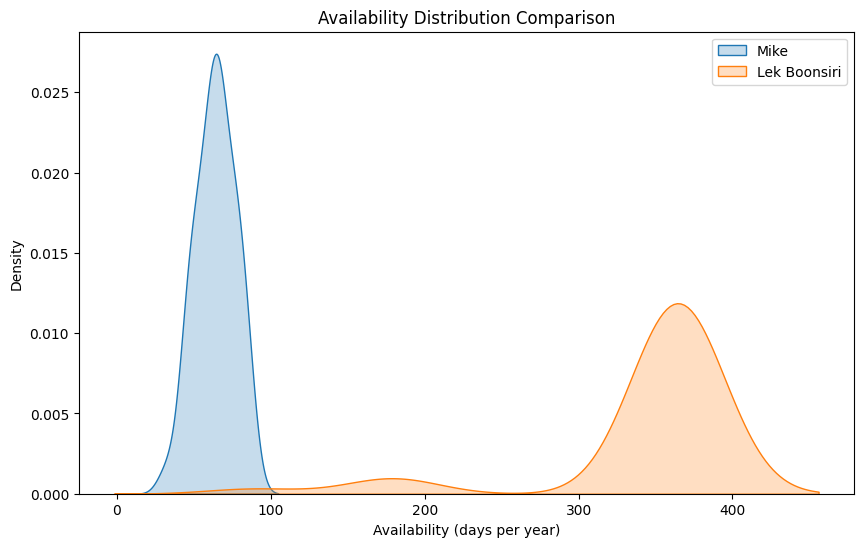

<ipython-input-81-f1b23db289c4>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-81-f1b23db289c4>:14: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




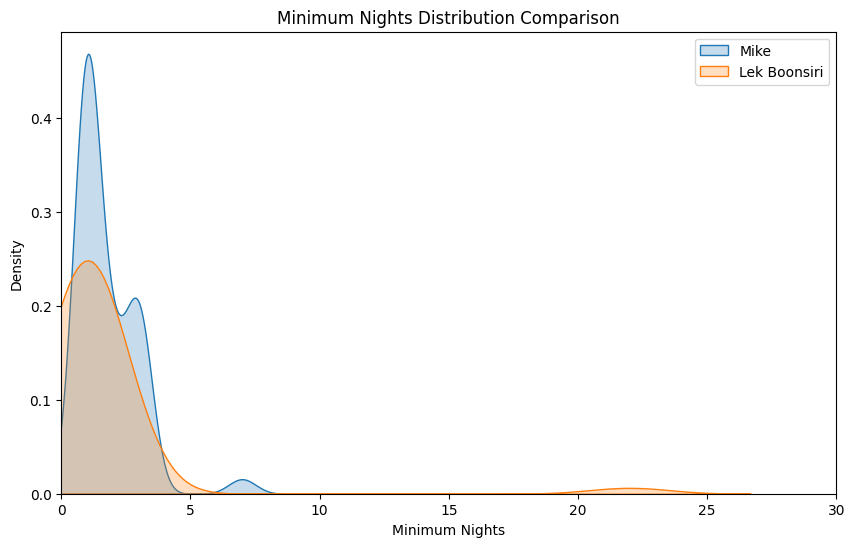

In [81]:
# Availability Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(mike_listings['availability_365'], label='Mike', shade=True)
sns.kdeplot(lek_listings['availability_365'], label='Lek Boonsiri', shade=True)
plt.title('Availability Distribution Comparison')
plt.xlabel('Availability (days per year)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Minimum Nights Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(mike_listings['minimum_nights'], label='Mike', shade=True)
sns.kdeplot(lek_listings['minimum_nights'], label='Lek Boonsiri', shade=True)
plt.title('Minimum Nights Distribution Comparison')
plt.xlabel('Minimum Nights')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, airbnb_data_cleaned['minimum_nights'].quantile(0.95))  # Focus on typical values
plt.show()

- Mike's listings have an average availability of 63.90 days/year, suggesting high occupancy rates.
- Lek's listings show an average availability of 344.24 days/year, indicating low occupancy.
- Minimum nights requirement is similar for both hosts, around 1.5 nights, offering flexibility to guests.

## Listing's Performance Metrics

In [82]:
mike_total_reviews = mike_listings['number_of_reviews'].sum()
lek_total_reviews = lek_listings['number_of_reviews'].sum()

print(f"Mike's Total Number of Reviews: {mike_total_reviews}")
print(f"Lek's Total Number of Reviews: {lek_total_reviews}")

Mike's Total Number of Reviews: 969
Lek's Total Number of Reviews: 15


In [83]:
mike_avg_reviews = mike_listings['number_of_reviews'].mean()
lek_avg_reviews = lek_listings['number_of_reviews'].mean()

print(f"Mike's Average Reviews per Listing: {mike_avg_reviews:.2f}")
print(f"Lek's Average Reviews per Listing: {lek_avg_reviews:.2f}")

Mike's Average Reviews per Listing: 19.78
Lek's Average Reviews per Listing: 0.37


<ipython-input-84-a8c0a7bc386e>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-84-a8c0a7bc386e>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




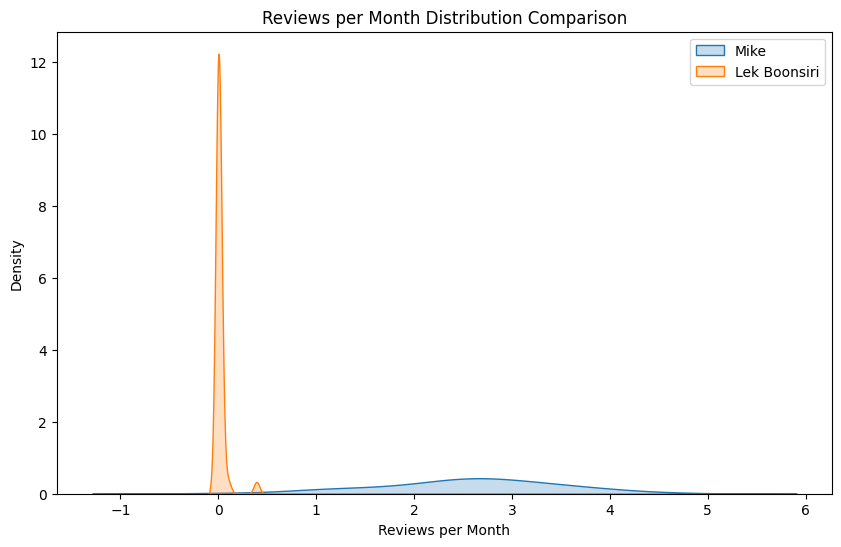

In [84]:
plt.figure(figsize=(10, 6))
sns.kdeplot(mike_listings['reviews_per_month'], label='Mike', shade=True)
sns.kdeplot(lek_listings['reviews_per_month'], label='Lek Boonsiri', shade=True)
plt.title('Reviews per Month Distribution Comparison')
plt.xlabel('Reviews per Month')
plt.ylabel('Density')
plt.legend()
plt.show()

## Host Activity and Engagement

In [85]:
import pandas as pd

# ... (assuming mike_listings and lek_listings are defined) ...

# Filter out placeholder values and find the maximum
mike_last_review = mike_listings[mike_listings['last_review'] != '9999-12-31']['last_review'].max()
lek_last_review = lek_listings[lek_listings['last_review'] != '9999-12-31']['last_review'].max()

# Handle cases with no reviews
if pd.isnull(mike_last_review):
    mike_last_review = "No reviews yet"
if pd.isnull(lek_last_review):
    lek_last_review = "No reviews yet"

print(f"Mike's Most Recent Review Date: {mike_last_review}")
print(f"Lek's Most Recent Review Date: {lek_last_review}")

Mike's Most Recent Review Date: 2022-12-28
Lek's Most Recent Review Date: 2022-10-14


In [86]:
# Convert 'last_review' to datetime, handling out-of-bounds dates
mike_listings['last_review'] = pd.to_datetime(mike_listings['last_review'], errors='coerce')
lek_listings['last_review'] = pd.to_datetime(lek_listings['last_review'], errors='coerce')

# Calculate days since last review, ignoring NaT values
current_date = pd.to_datetime('today')
mike_listings['days_since_last_review'] = (current_date - mike_listings['last_review']).dt.days
lek_listings['days_since_last_review'] = (current_date - lek_listings['last_review']).dt.days

# Average days since last review, ignoring NaT values
mike_avg_days_since_review = mike_listings['days_since_last_review'].mean()
lek_avg_days_since_review = lek_listings['days_since_last_review'].mean()

print(f"Mike's Average Days Since Last Review: {mike_avg_days_since_review:.0f} days")
print(f"Lek's Average Days Since Last Review: {lek_avg_days_since_review:.0f} days")

Mike's Average Days Since Last Review: 726 days
Lek's Average Days Since Last Review: 2181 days


## Seasonality and Last Review Dates


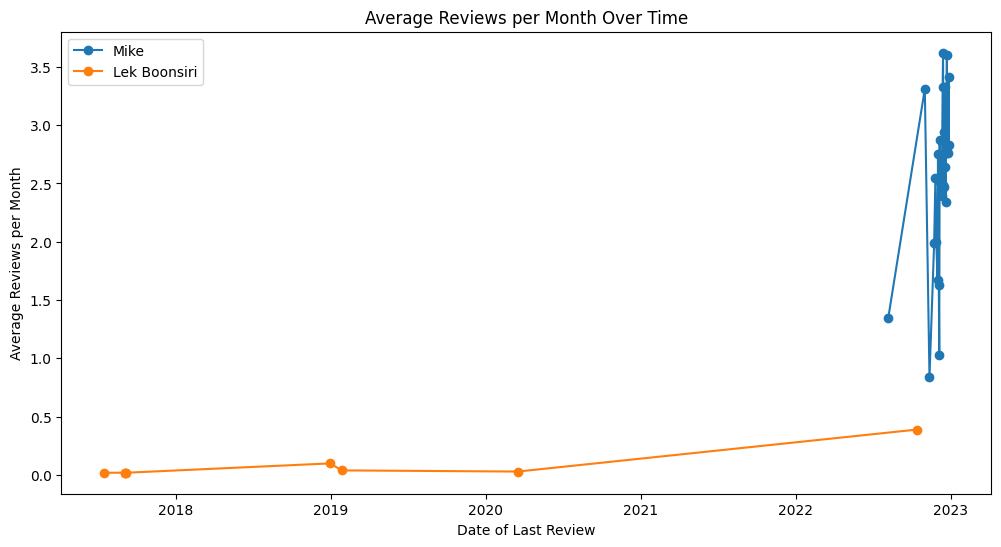

In [87]:
# Reviews per Month Over Time for Mike
mike_reviews_time = mike_listings.groupby('last_review')['reviews_per_month'].mean().reset_index()
mike_reviews_time = mike_reviews_time.sort_values('last_review')

# Reviews per Month Over Time for Lek
lek_reviews_time = lek_listings.groupby('last_review')['reviews_per_month'].mean().reset_index()
lek_reviews_time = lek_reviews_time.sort_values('last_review')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(mike_reviews_time['last_review'], mike_reviews_time['reviews_per_month'], label='Mike', marker='o')
plt.plot(lek_reviews_time['last_review'], lek_reviews_time['reviews_per_month'], label='Lek Boonsiri', marker='o')
plt.title('Average Reviews per Month Over Time')
plt.xlabel('Date of Last Review')
plt.ylabel('Average Reviews per Month')
plt.legend()
plt.show()

## Listing Descriptions and Amenities

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Top 20 Words in Mike's Listings:
[('nanamrt', 31), ('location', 17), ('perfect', 11), ('poolgymsukhumvit', 4), ('weekly', 1), ('luxurypoolgymsukhumvit', 1)]

Top 20 Words in Lek Boonsiri's Listings:
[('room', 24), ('near', 19), ('hotel', 15), ('deluxe', 10), ('suite', 7), ('sukhumvit', 6), ('bed', 5), ('king', 4), ('school', 4), ('road', 4), ('bts', 4), ('sky', 4), ('corner', 3), ('rd', 3), ('sabai', 3), ('honeymoon', 3), ('family', 2), ('big', 2), ('c', 2), ('international', 2)]

Unique Words in Mike's Listings:
{'nanamrt', 'weekly', 'poolgymsukhumvit', 'perfect', 'location', 'luxurypoolgymsukhumvit'}

Unique Words in Lek Boonsiri's Listings:
{'onnut', 'soi', 'tesco', 'ekkamai', 'comfy', 'pb', 'btsa', 'lotes', 'phra', 'moon', 'corner', 'klong', 'c', 'polytechnic', 'bus', 'rooms', 'family', 'sukhumvit', 'thonglorekkamai', 'king', 'hospitaldeluxe', 'single', 'honeymoon', 'big', 'ride', 'suite', 'andrews', 'queen', 'bed', 'onnutsukhumvit', 'mall', 'thong', 'tower', 'bedroom', 'bts', 'com

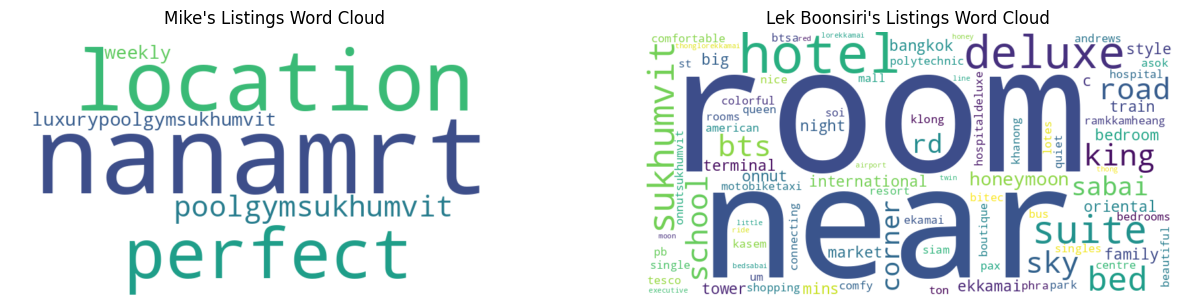

In [88]:
# Import necessary libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk # Import nltk explicitly

# Download the 'stopwords' and 'punkt' data if not already present
nltk.download('stopwords') # Download stopwords
nltk.download('punkt_tab') # Download punkt_tab instead of punkt

# Load the cleaned data
airbnb_data_cleaned = pd.read_csv('airbnb_data_cleaned.csv')

# Filter listings for Mike and Lek Boonsiri
mike_listings = airbnb_data_cleaned[airbnb_data_cleaned['host_id'] == 312545246]
lek_listings = airbnb_data_cleaned[airbnb_data_cleaned['host_id'] == 44305808]

# Extract the 'name' column for each host
mike_names = mike_listings['name'].dropna().tolist()
lek_names = lek_listings['name'].dropna().tolist()

# Function to preprocess text
def preprocess_text(text_list):
    # Combine all names into one string
    text = ' '.join(text_list)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords (English and Thai, if necessary)
    stop_words = set(stopwords.words('english'))
    # If your data contains Thai text, you can add Thai stopwords as well
    # For this example, we'll assume English listings
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return words

# Preprocess names for each host
mike_words = preprocess_text(mike_names)
lek_words = preprocess_text(lek_names)

# Get word frequencies
mike_word_freq = Counter(mike_words)
lek_word_freq = Counter(lek_words)

# Display the most common words for each host
print("Top 20 Words in Mike's Listings:")
print(mike_word_freq.most_common(20))

print("\nTop 20 Words in Lek Boonsiri's Listings:")
print(lek_word_freq.most_common(20))

# Identify unique words for each host
unique_mike_words = set(mike_words) - set(lek_words)
unique_lek_words = set(lek_words) - set(mike_words)

print("\nUnique Words in Mike's Listings:")
print(unique_mike_words)

print("\nUnique Words in Lek Boonsiri's Listings:")
print(unique_lek_words)

# Optional: Create word clouds for visualization
# Generate word cloud for Mike
mike_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(mike_word_freq)

# Generate word cloud for Lek
lek_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(lek_word_freq)

# Plot the word clouds
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(mike_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Mike's Listings Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(lek_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Lek Boonsiri's Listings Word Cloud")

plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Top 20 Words in Mike's Listings:
[('nanamrt', 31), ('location', 17), ('perfect', 11), ('poolgymsukhumvit', 4), ('weekly', 1), ('luxurypoolgymsukhumvit', 1)]

Top 20 Words in Lek Boonsiri's Listings:
[('room', 24), ('near', 19), ('hotel', 15), ('deluxe', 10), ('suite', 7), ('sukhumvit', 6), ('bed', 5), ('king', 4), ('school', 4), ('road', 4), ('bts', 4), ('sky', 4), ('corner', 3), ('rd', 3), ('sabai', 3), ('honeymoon', 3), ('family', 2), ('big', 2), ('c', 2), ('international', 2)]

Unique Words in Mike's Listings:
{'nanamrt', 'weekly', 'poolgymsukhumvit', 'perfect', 'location', 'luxurypoolgymsukhumvit'}

Unique Words in Lek Boonsiri's Listings:
{'onnut', 'soi', 'tesco', 'ekkamai', 'comfy', 'pb', 'btsa', 'lotes', 'phra', 'moon', 'corner', 'klong', 'c', 'polytechnic', 'bus', 'rooms', 'family', 'sukhumvit', 'thonglorekkamai', 'king', 'hospitaldeluxe', 'single', 'honeymoon', 'big', 'ride', 'suite', 'andrews', 'queen', 'bed', 'onnutsukhumvit', 'mall', 'thong', 'tower', 'bedroom', 'bts', 'com

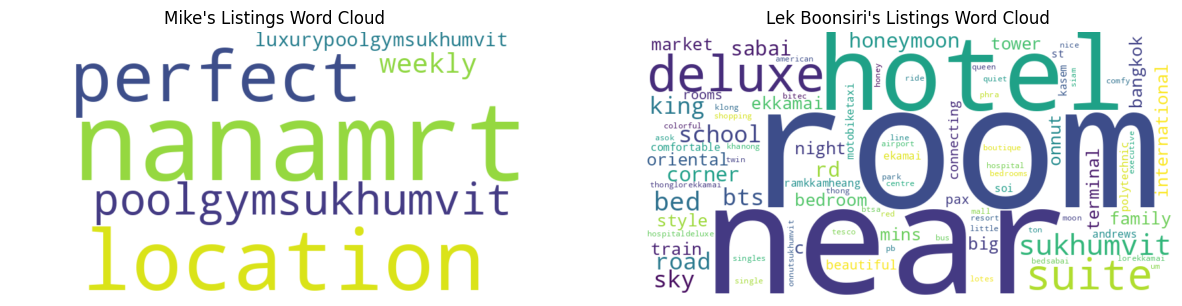

In [89]:
# Import necessary libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk # Import nltk explicitly

# Download the 'stopwords' and 'punkt' data if not already present
nltk.download('stopwords') # Download stopwords
nltk.download('punkt') # Download punkt

# Load the cleaned data
airbnb_data_cleaned = pd.read_csv('airbnb_data_cleaned.csv')

# Filter listings for Mike and Lek Boonsiri
mike_listings = airbnb_data_cleaned[airbnb_data_cleaned['host_id'] == 312545246]
lek_listings = airbnb_data_cleaned[airbnb_data_cleaned['host_id'] == 44305808]

# Extract the 'name' column for each host
mike_names = mike_listings['name'].dropna().tolist()
lek_names = lek_listings['name'].dropna().tolist()

# Function to preprocess text
def preprocess_text(text_list):
    # Combine all names into one string
    text = ' '.join(text_list)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords (English and Thai, if necessary)
    stop_words = set(stopwords.words('english'))
    # If your data contains Thai text, you can add Thai stopwords as well
    # For this example, we'll assume English listings
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return words

# Preprocess names for each host
mike_words = preprocess_text(mike_names)
lek_words = preprocess_text(lek_names)

# Get word frequencies
mike_word_freq = Counter(mike_words)
lek_word_freq = Counter(lek_words)

# Display the most common words for each host
print("Top 20 Words in Mike's Listings:")
print(mike_word_freq.most_common(20))

print("\nTop 20 Words in Lek Boonsiri's Listings:")
print(lek_word_freq.most_common(20))

# Identify unique words for each host
unique_mike_words = set(mike_words) - set(lek_words)
unique_lek_words = set(lek_words) - set(mike_words)

print("\nUnique Words in Mike's Listings:")
print(unique_mike_words)

print("\nUnique Words in Lek Boonsiri's Listings:")
print(unique_lek_words)

# Optional: Create word clouds for visualization
# Generate word cloud for Mike
mike_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(mike_word_freq)

# Generate word cloud for Lek
lek_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(lek_word_freq)

# Plot the word clouds
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(mike_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Mike's Listings Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(lek_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Lek Boonsiri's Listings Word Cloud")

plt.show()

In [90]:
mike_listings

id                                               name  \
9018             40437872   7F37#Weekly・Gym&Pool&BTS Nana&MRT Sukhumvit&Max4   
9161             41026318   8F43#Monthly&Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
9186             40927762     Monthly#12F85#Pool&BTS Nana&MRT Sukhumvit&4ppl   
9188             40929486   8F44#Monthly#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11081            52725061   7F34#Monthly#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11193            53243096           8F42#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11194            53244374           8F45#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11195            53244757           8F47#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11197            53244918           8F52#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11198            53245040           9F55#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11199            53245636           9F58#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11201            53250140           9F62#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11202            53250420           9F63#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11203            53250620  Monthly・10F69#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11204            53250913          10F72#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11205            53251118          10F74#Pool&BTS Nana&MRT Sukhumvit&Max4ppl   
11550  563936486824601479           6F22#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
11553  564126677488703250           6F23#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
11554  564142677791950174           6F25#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
11556  564169459872519228           6F29#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
11560  564879108994452181    Weekly・7F40#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
11580  567070239745853360          7F37#Gym&Pool&BTS Nana&MRT Sukhumvit&Max4   
11796  603438520789848320           6F28#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
11883  599109616072964220  Perfect location# Pool(50F)#Gym@Sukhumvit 24(556)   
11884  599127544564690519  Perfect location# Pool(50F)#Gym@Sukhumvit 24(557)   
11972  628444950434402690           9F54#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
12218  640990797575203244         17F134#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
12219  640990832929071656         17F135#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
12335  654696074899917851  39F!Perfect location# Pool#Gym@Sukhumvit 24(1197)   
12509  668414630834550798   20F!Perfect location# Pool#Gym@Sukhumvit 24(965)   
12553  664017376002360307           9F61#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
12565  678537783189084406   10F68#Gym&Pool&BTS Nana&MRT Sukhumvit&Max4&100m2   
12795  696768868360194214   17F48#Perfect location# Pool#Gym@BTS/MRT&Max3ppl   
12797  696852086559011846  9F101#Perfect location# Pool#Gym@BTS/MRT&2BR#5ppl   
13116  694605202521903820          10F73#Pool&BTS Nana&MRT Sukhumvit&Max2ppl   
13342  717042181450822204   Perfect location# Pool#Gym@BTS/MRT&2BR#5ppl(126)   
13343  717055166181117100   Perfect location# Pool#Gym@BTS/MRT&2BR#5ppl(128)   
13344  717069204956920428    Perfect location# Pool#Gym@BTS/MRT&Max3ppl(125)   
13345  717077709349017688    Perfect location# Pool#Gym@BTS/MRT&Max3ppl(127)   
13346  717085383289420707    Perfect location# Pool#Gym@BTS/MRT&Max3ppl(129)   
13562  727187440589106913   19F!Perfect location# Pool#Gym@Sukhumvit 24(953)   
13846  747516270720011552  17F138#Gym&Pool&BTS Nana&MRT Sukhumvit&Max4&100m2   
13849  747542278762782513    Perfect location# Pool#Gym@BTS/MRT&Max3ppl(122)   
13850  747587771523895108    Perfect location# Pool#Gym@BTS/MRT&Max3ppl(124)   
13853  747597226267095654   Perfect location# Pool#Gym@BTS/MRT&2BR#5ppl(121)   
13855  747611005229848744   Perfect location# Pool#Gym@BTS/MRT&2BR#5ppl(123)   
13971  757720203729400827  40F!Perfect location# Pool#Gym@Sukhumvit 24(1209)   
13972  757740515985493693    Weekly! 38F! Luxury#Pool&Gym@Sukhumvit 24(1196)   
14778  788104649280595223  16F129#Gym&Pool&BTS Nana&MRT Sukhumvit&Max4&100m2   

         host_id host_

In [91]:
lek_boonsiri_listings

id                                               name   host_id  \
1091   8410736          2 connecting rooms ( family room 4-5 pax)  44305808   
2918  18198198  Beautiful corner suite 401, King bed, Sukhumvi...  44305808   
2921  18202526       HOTEL NEAR THE BIG C RAMKKAMHEANG - ROOM 503  44305808   
2922  18202532  HOTEL NEAR EKAMAI INTERNATIONAL SCHOOL - ROOM 504  44305808   
2923  18202535  HOTEL NEAR ST. ANDREWS INTERNATIONAL SCHOOL- R...  44305808   
2924  18202537        Comfortable room deluxe 404, Sukhumvit road  44305808   
2925  18202541       5-10 mins by motobike/taxi to Ekkamai Soi 10  44305808   
2926  18202543     HOTEL NEAR KASEM POLYTECHNIC SCHOOL - ROOM 406  44305808   
2927  18202544       HOTEL NEAR BANGKOK HOSPITAL-DELUXE- ROOM 407  44305808   
2928  18202545            HOTEL NEAR KLONG TON HOSPITAL- ROOM 408  44305808   
2929  18202547                   HOTEL NEAR THE UM TOWER ROOM 409  44305808   
2930  18202548                  HOTEL NEAR THE PB TOWER- ROOM 410  44305808   
2931  18202551           HOTEL NEAR THE AMERICAN SCHOOL- ROOM 411  44305808   
2932  18202552  Corner suite # 301, king bed, Onnut-Sukhumvit rd.  44305808   
2933  18202563          Deluxe Queen bedroom# 303, Sukhumvit road  44305808   
2934  18202566   Sabai Sabai Hotel, 12KM FROM SIAM PARK, ROOM 304  44305808   
2935  18202571           Colorful room Deluxe 305, Sukhumvit road  44305808   
2936  18202574  HOTEL NEAR BIG C AND TESCO LOTES ONNUT - ROOM 306  44305808   
2937  18202575  8KM FROM SHOPPING MALL TERMINAL 21 ASOK - ROOM...  44305808   
2938  18202577     Boutique hotel BITEC CENTRE BANGKOK - ROOM 308  44305808   
2939  18202578     Comfy 2 singles bedroom,#309 near bus terminal  44305808   
2940  18202579        Nice Deluxe # 310 2 Single bed Sukhumvit RD  44305808   
2941  18202580           RESORT STYLE HOTEL Near Phra Khanong BTS  44305808   
2949  18202755                      2 bedrooms, Corner suite# 402  44305808   
3001  17881967   5mins to BTS-A quiet hotel near Thonglor/Ekkamai  44305808   
3048  17932458  Executive suite #501 with king bed, Sukhumvit ...  44305808   
3049  17932736  Oriental # 602, bed,Sabai Sabai Hotel , On-nut...  44305808   
3051  17933279                    Sky Garden#601  honeymoon suite  44305808   
3052  17933415        Honeymoon Sky Garden#605 with king bedroom.  44305808   
4843  26171773               10-15 mins ride to Thong Lor/Ekkamai  44305808   
4925  26370136                                           Room 506  44305808   
5877  30356698                             little honeymoon suite  44305808   
7558  35561272                 Deluxe Room The Near BTS Sky Train  44305808   
7560  35562164                      Deluxe Room near Night Market  44305808   
7561  35562840                 Deluxe Room  Near The Night Market  44305808   
7576  35582662                              Deluxe Room Red Style  44305808   
7578  35583034                               Deluxe Room Twin Bed  44305808   
7579  35583043                           Deluxe Room Near Ekkamai  44305808   
7589  35584868                 Honey moon Room Near BTS Sky Train  44305808   
7597  35595298                 Oriental Suite, Near Airport Line.  44305808   
7881  36363086                                        Family Room  44305808   

         host_name neighbourhood  latitude  longitude     room_type  price  \
1091  Lek Boonsiri       Vadhana  13.73225  100.59628    Hotel room   2386   
2918  Lek Boonsiri       Vadhana  13.73234  100.59842    Hotel room   1743   
2921  Lek Boonsiri       Vadhana  13.73126  100.59773    Hotel room   1074   
2922  Lek Boonsiri       Vadhana  13.72993  100.59731  Private room   1042   
2923  Lek Boonsiri       Vadhana  13.73236  100.59846  Private room   1126   
2924  Lek Boonsiri       Vadhana  13.73230  100.59846  Private room   1023   
2925  Lek Boonsiri       Vadhana  13.73224  100.59842  Private room   1128   
2926  Lek Boonsiri       Vadhana  13.73230  100.59840    Hotel room  

**Word Frequency Analysis**
- Mike's listings frequently use terms like "NanaMRT", "perfect location", "pool gym Sukhumvit", emphasizing convenience and amenities.
- Lek's listings commonly include words like "room", "near", "hotel", "deluxe", which are more generic and less enticing.

## Vadhana Listings insights

In [92]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

# Assuming 'airbnb_data_cleaned' is your DataFrame
# Filter listings for Vadhana neighborhood
vadhana_listings = airbnb_data_cleaned[airbnb_data_cleaned['neighbourhood'] == 'Vadhana']

# Check the number of listings in Vadhana
print(f"Total listings in Vadhana: {vadhana_listings.shape[0]}")

Total listings in Vadhana: 2053


Room Type Counts in Vadhana:
room_type
Entire home/apt    1373
Private room        522
Hotel room          105
Shared room          53
Name: count, dtype: int64

Room Type Percentages in Vadhana:
room_type
Entire home/apt    66.877740
Private room       25.426206
Hotel room          5.114467
Shared room         2.581588
Name: proportion, dtype: float64


<ipython-input-93-5ad14e435648>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




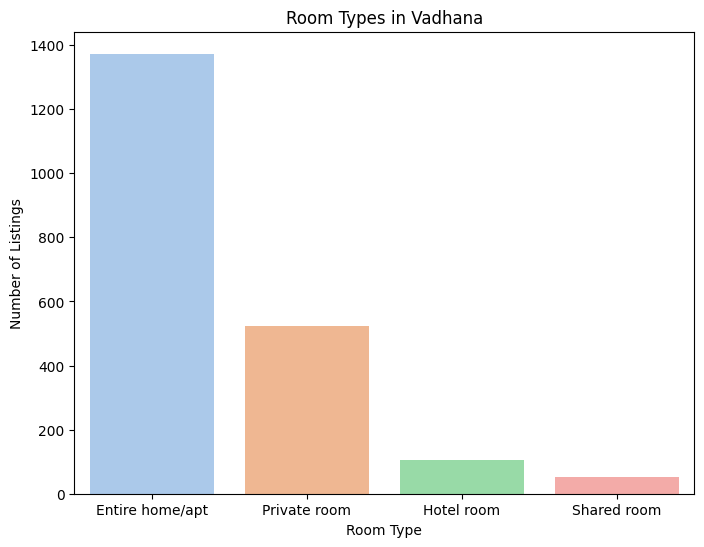

In [93]:
# Calculate counts and percentages of room types
room_type_counts = vadhana_listings['room_type'].value_counts()
room_type_percentages = vadhana_listings['room_type'].value_counts(normalize=True) * 100

# Display counts and percentages
print("Room Type Counts in Vadhana:")
print(room_type_counts)
print("\nRoom Type Percentages in Vadhana:")
print(room_type_percentages)

# Visualize the room types with a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=vadhana_listings, order=room_type_counts.index, palette='pastel')
plt.title('Room Types in Vadhana')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

In [94]:
# Calculate descriptive statistics for price
price_stats_vadhana = vadhana_listings['price'].describe()
print("Price Statistics for Vadhana:")
print(price_stats_vadhana)

Price Statistics for Vadhana:
count      2053.000000
mean       3471.604968
std        7857.904763
min         350.000000
25%        1300.000000
50%        2000.000000
75%        3500.000000
max      250344.000000
Name: price, dtype: float64


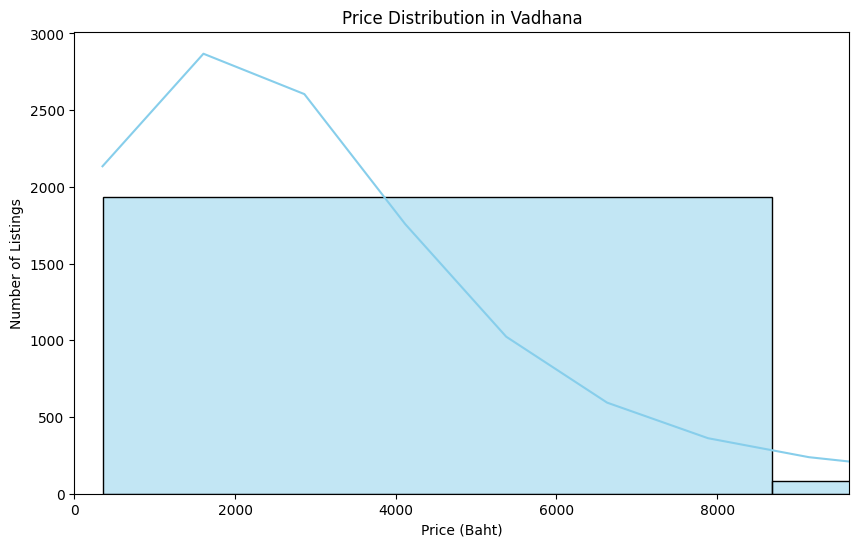

In [95]:
# Histogram of price distribution
plt.figure(figsize=(10, 6))
sns.histplot(vadhana_listings['price'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution in Vadhana')
plt.xlabel('Price (Baht)')
plt.ylabel('Number of Listings')
plt.xlim(0, vadhana_listings['price'].quantile(0.95))  # Limit x-axis to 95th percentile
plt.show()

<ipython-input-96-d433fb641eaa>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




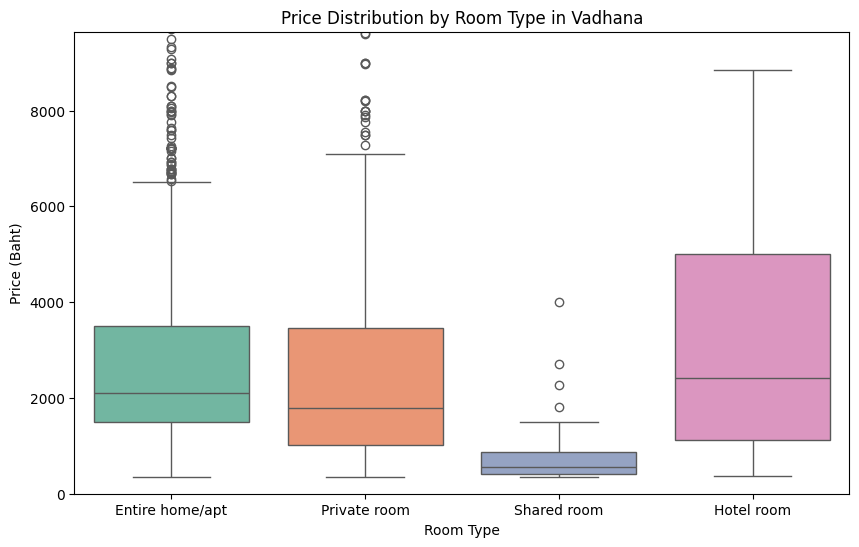

In [96]:
# Box plot of prices by room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=vadhana_listings, palette='Set2')
plt.title('Price Distribution by Room Type in Vadhana')
plt.xlabel('Room Type')
plt.ylabel('Price (Baht)')
plt.ylim(0, vadhana_listings['price'].quantile(0.95))
plt.show()

In [100]:
# prompt:  calculate descriptive statistics for price distribution by room type in vadhana

# Group data by room type and calculate descriptive statistics for price
price_stats_by_room_type = vadhana_listings.groupby('room_type')['price'].describe()

# Display the statistics
print("Descriptive Statistics of Price by Room Type in Vadhana:")
price_stats_by_room_type

Descriptive Statistics of Price by Room Type in Vadhana:


count         mean          std    min      25%     50%  \
room_type                                                                   
Entire home/apt  1038.0  3208.154143  4624.305276  350.0  1450.00  2100.0   
Hotel room         58.0  3898.172414  3727.390561  365.0  1809.75  3189.5   
Private room      238.0  2528.012605  6702.289414  350.0   944.75  1399.5   
Shared room        25.0   537.400000   265.139900  350.0   390.00   448.0   

                     75%       max  
room_type                           
Entire home/apt  3500.00  100194.0  
Hotel room       5172.25   24390.0  
Private room     2232.25   98000.0  
Shared room       565.00    1500.0

In [97]:
# Extract the 'name' column and drop missing values
vadhana_names = vadhana_listings['name'].dropna().tolist()

# Function to preprocess text
def preprocess_text(text_list):
    # Combine all names into one string
    text = ' '.join(text_list)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    # Add custom stopwords if necessary
    custom_stopwords = {'bangkok', 'vadhana', 'bkk', 'bnb', 'apt', 'airbnb'}
    stop_words.update(custom_stopwords)
    # Remove stopwords and non-alphabetic tokens
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return words

# Preprocess names
vadhana_words = preprocess_text(vadhana_names)

# Get word frequencies
vadhana_word_freq = Counter(vadhana_words)

# Display the most common words
print("Top 20 Words in Vadhana Listings:")
print(vadhana_word_freq.most_common(20))

Top 20 Words in Vadhana Listings:
[('bts', 486), ('sukhumvit', 293), ('room', 242), ('nana', 179), ('condo', 166), ('near', 164), ('luxury', 156), ('bedroom', 156), ('apartment', 127), ('thonglor', 122), ('pool', 108), ('wifi', 97), ('cozy', 87), ('private', 87), ('asok', 87), ('view', 85), ('bed', 85), ('suite', 84), ('asoke', 72), ('city', 72)]


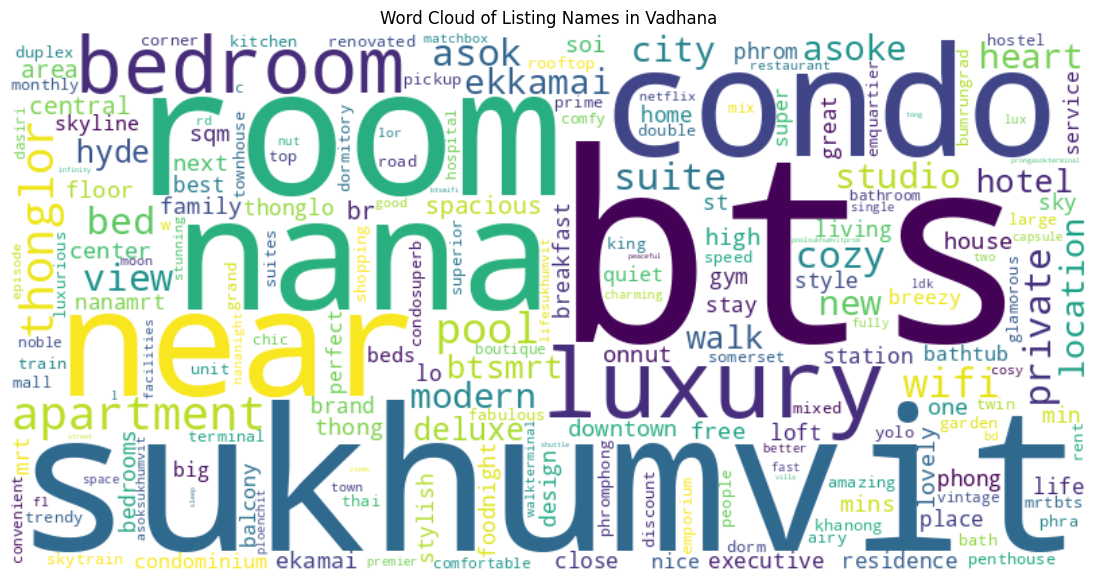

In [98]:
# Generate word cloud
vadhana_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vadhana_word_freq)

# Plot the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(vadhana_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Listing Names in Vadhana")
plt.show()

<ipython-input-99-e95318f72a15>:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-99-e95318f72a15>:58: UserWarning:

Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from current font.

<ipython-input-99-e95318f72a15>:58: UserWarning:

Glyph 32418 (\N{CJK UNIFIED IDEOGRAPH-7EA2}) missing from current font.

<ipython-input-99-e95318f72a15>:58: UserWarning:

Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from current font.

<ipython-input-99-e95318f72a15>:58: UserWarning:

Glyph 35946 (\N{CJK UNIFIED IDEOGRAPH-8C6A}) missing from current font.

<ipython-input-99-e95318f72a15>:58: UserWarning:

Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.

<ipython-input-99-e95318f72a15>:58: UserWarning:

Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from current font.

<ipython-input-99-e95318f72a15>:58: UserW

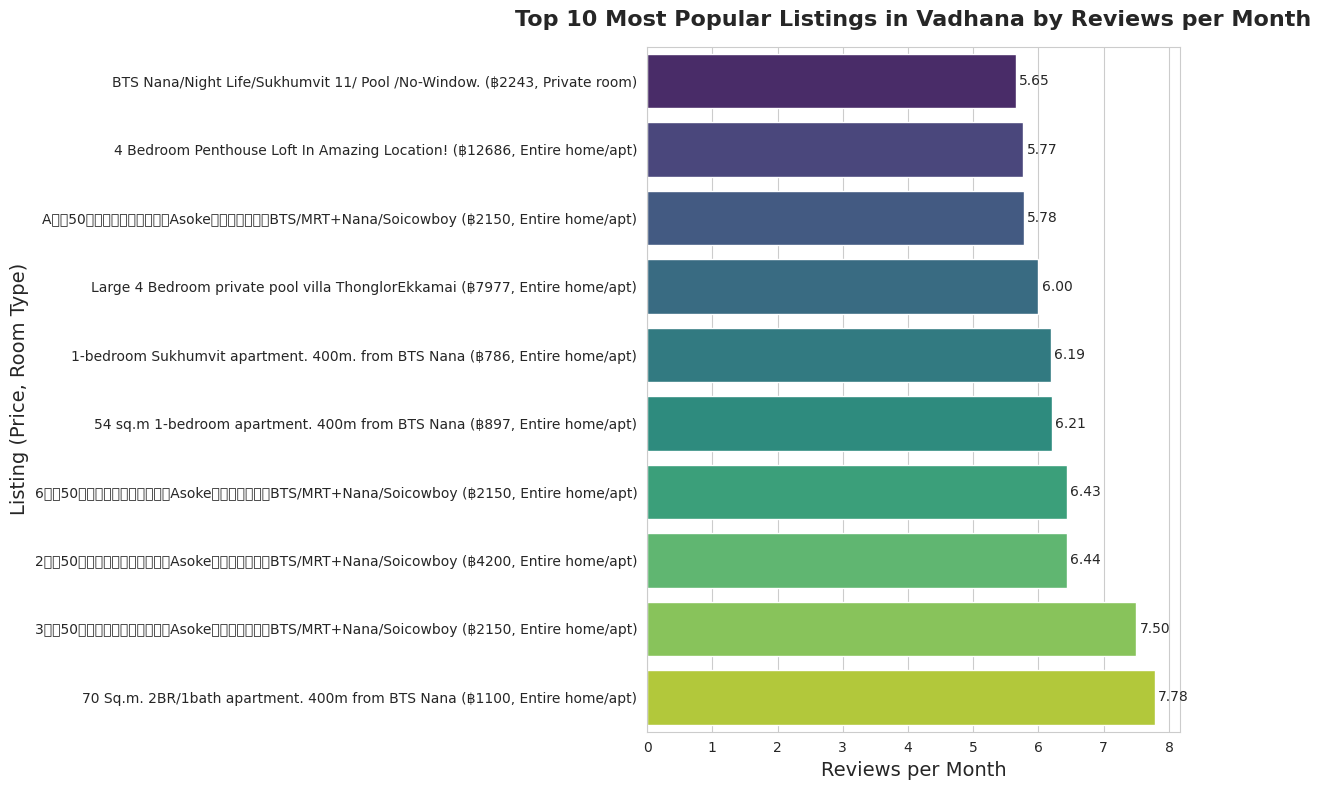

In [99]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned Airbnb data
# Replace 'airbnb_data_cleaned.csv' with the path to your dataset if different
airbnb_data_cleaned = pd.read_csv('airbnb_data_cleaned.csv')

# Filter listings for Vadhana neighborhood with reviews_per_month > 0
vadhana_listings = airbnb_data_cleaned[
    (airbnb_data_cleaned['neighbourhood'] == 'Vadhana') &
    (airbnb_data_cleaned['reviews_per_month'] > 0)
]

# Sort listings by 'reviews_per_month' in descending order and select top N listings
top_n = 10  # You can adjust this number as needed
vadhana_top_listings = vadhana_listings.sort_values(by='reviews_per_month', ascending=False).head(top_n)

# Prepare data for plotting
plot_data = vadhana_top_listings[['name', 'reviews_per_month', 'price', 'room_type']].copy()
plot_data = plot_data.iloc[::-1]  # Reverse the order for horizontal bar chart

# Create a label combining name, price, and room type (truncate name if too long)
max_name_length = 50
plot_data['label'] = plot_data.apply(
    lambda row: f"{row['name'][:max_name_length]}... (฿{row['price']}, {row['room_type']})" if len(row['name']) > max_name_length else f"{row['name']} (฿{row['price']}, {row['room_type']})",
    axis=1
)

# Set the style for the plot
sns.set_style('whitegrid')

# Create the figure and axes for the horizontal bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='reviews_per_month',
    y='label',
    data=plot_data,
    palette='viridis'
)

# Add data labels to each bar
for index, value in enumerate(plot_data['reviews_per_month']):
    plt.text(
        x=value + 0.05,  # Slightly offset to the right of the bar
        y=index,         # Corresponds to the y-position of the bar
        s=f"{value:.2f}",  # Format the value to two decimal places
        va='center'
    )

# Add titles and labels
plt.title('Top 10 Most Popular Listings in Vadhana by Reviews per Month', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Reviews per Month', fontsize=14)
plt.ylabel('Listing (Price, Room Type)', fontsize=14)

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

**Vadhana Neighborhood Insights**
- Total listings: 2,053, making it a significant area in Bangkok's Airbnb market.
- Room Type Distribution:
  - Entire home/apt: 66.88%
  - Private room: 25.43%
  - Hotel room: 5.11%
- Price Statistics:
  - Average price: 3,471.60 Baht
  - Median price: 2,000 Baht
- Popular Keywords in listings:
  - "BTS", "Sukhumvit", "Nana", "luxury", indicating the importance of location and quality.

# Insights from Data Analysis and Recommendations

##1. Key Insights:



- Location Advantage:
  - Mike's properties are strategically located near transportation hubs (BTS, MRT) and popular districts, enhancing their appeal.

- Marketing and Branding:
  - Mike effectively markets his listings by highlighting unique selling points (e.g., perfect location, amenities), whereas Lek's listings lack distinctive features.

- Room Type Preference:
  - Guests in Bangkok, particularly in Vadhana, prefer entire homes/apartments over hotel or private rooms.

- Pricing Strategy:
  - Despite offering lower prices, Lek's listings underperform, suggesting that price isn't the sole factor; quality and guest experience matter significantly.

- Host Engagement:
  - Mike's active engagement, evident from recent reviews and consistent occupancy, contributes to higher guest trust and booking rates.




##2. Hosts Recommendations



**For Lek Boonsiri:**
  - Enhance Listing Descriptions:
   - Highlight unique features and amenities.
     - Use attractive keywords that align with guest preferences (e.g., proximity to BTS, luxury amenities).
     - Update listing titles to be more engaging and descriptive.
  - Optimize Pricing:
    - Consider aligning prices with neighborhood averages, emphasizing value for money.
    - Implement dynamic pricing strategies to adjust for demand fluctuations.
  - Increase Host Engagement:
    - Encourage guests to leave reviews.
    - Respond promptly to inquiries and booking requests.
  - Upgrade Property Offerings:
    - If feasible, transition to offering entire apartments.
    - Enhance the quality of accommodations to meet guest expectations.

**For Mike:**
  - Maintain High Standards:
    - Continue leveraging location and amenities.
    - Keep engaging with guests to sustain positive reviews.
  - Explore Expansion:
    - Consider adding more listings in high-demand areas.
    - Experiment with premium services to justify higher pricing.

**For Both Hosts:**
  - Analyze Competitors:
    - Regularly review market trends and adjust strategies accordingly.
    - Monitor successful listings in the area for best practices.
  - Leverage Data Insights:
    - Use data analytics to understand guest preferences and adjust offerings.


## 3.  Guests (Travelers) Recommendations

- Utilize Price Categories to Find the Best Value:

  - Budget Travelers: Look for listings in the Budget and Moderate price categories, which offer cost-effective accommodations.
  - Seeking Comfort or Luxury: Explore Average and Luxury listings for enhanced amenities and services.
- Consider Location and Accessibility:
  - Prioritize listings near transportation hubs like BTS and MRT stations for convenient travel.
  - Use filters to search for properties in popular neighborhoods such as Vadhana, which offer a variety of amenities and attractions.
- Assess Host Performance and Listing Quality:
  - Check the host's average reviews per month and total number of reviews to gauge engagement and reliability.
  - Read recent guest reviews to understand the quality of the accommodation and host responsiveness.
- Leverage Detailed Descriptions and Amenities:
  - Look for listings that provide thorough descriptions and highlight amenities important to you (e.g., Wi-Fi, pool, gym).
  - Pay attention to listing photos to ensure the property meets your expectations.
- Flexibility in Booking:
  - Consider minimum night requirements and availability when planning your stay to find accommodations that fit your schedule.
